In [1]:
import pandas as pd
import matplotlib as plt

In [255]:
classes = ['Criteria i', 'Criteria ii', 'Criteria iii', 'Criteria iv', 'Criteria v', 'Criteria vi', 
              'Criteria vii', 'Criteria viii', 'Criteria ix', 'Criteria x', 'Others']

In [410]:
classes

['Criteria i',
 'Criteria ii',
 'Criteria iii',
 'Criteria iv',
 'Criteria v',
 'Criteria vi',
 'Criteria vii',
 'Criteria viii',
 'Criteria ix',
 'Criteria x',
 'Others']

In [256]:
percentages = pd.DataFrame(classes,columns=['OUV']).set_index('OUV')

In [257]:
percentages

""
OUV
Criteria i
Criteria ii
Criteria iii
Criteria iv
Criteria v
Criteria vi
Criteria vii
Criteria viii
Criteria ix


## Venezia

In [238]:
bert = pd.read_csv('Venezia/data_storage/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')

In [239]:
bert['max_1_eq'] = bert['max_1_eq'].fillna(-1)

In [240]:
bert = bert[bert.max_1_eq!=-1]

In [241]:
cmp = pd.read_csv('Venezia/data_storage/metadata_compare.csv',sep='\t',index_col='Unnamed: 0')

In [242]:
cmp = cmp.merge(bert[['max_1_eq','max_3_eq']], how='right',left_index=True, right_index=True)

In [243]:
cmp['conf_3'] = (cmp['max_3_ulmfit'] + cmp['max_3_bert'])/2
cmp['conf_1'] = (cmp['max_1_ulmfit'] + cmp['max_1_bert'])/2

In [244]:
cmp['conf_3'].describe()

count    1761.000000
mean        0.787367
std         0.069555
min         0.517463
25%         0.753484
50%         0.795530
75%         0.836271
max         0.940598
Name: conf_3, dtype: float64

In [245]:
cmp['conf_1'].describe()

count    1761.000000
mean        0.427770
std         0.094998
min         0.203504
25%         0.356832
50%         0.416490
75%         0.503618
max         0.802082
Name: conf_1, dtype: float64

In [246]:
cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3362900713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]


In [247]:
cmp_conf

,origin,index,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1_eq,max_3_eq,conf_3,conf_1
0,3,51870743082,Criteria iii,Criteria ii,Criteria iv,0.358030,0.830680,Criteria ii,Criteria iv,Criteria i,0.362388,0.787226,False,0.5,0.812573,True,1.0,0.808953,0.360209
1,4,51871789478,Criteria iii,Criteria ii,Criteria iv,0.399754,0.759217,Criteria ii,Criteria i,Criteria iv,0.638658,0.898092,False,0.5,0.525624,True,1.0,0.828654,0.519206
2,5,51870742942,Criteria iii,Criteria ii,Criteria iv,0.345548,0.814499,Criteria ii,Criteria i,Criteria iv,0.396352,0.812845,False,0.5,0.756251,True,1.0,0.813672,0.370950
3,6,51870380541,Criteria iii,Criteria vi,Criteria iv,0.470955,0.865256,Criteria vi,Criteria iii,Criteria iv,0.823930,0.930945,False,1.0,0.462165,True,0.5,0.898100,0.647442
4,13,51863124066,Criteria iv,Criteria i,Criteria ii,0.247691,0.672674,Criteria vi,Criteria iv,Criteria i,0.337761,0.871130,False,0.5,0.853685,False,1.0,0.771902,0.292726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,4981,51233430558,Criteria iii,Criteria iv,Criteria ii,0.462594,0.865238,Criteria i,Criteria ii,Criteria iv,0.571989,0.903156,False,0.5,0.313572,True,1.0,0.884197,0.517292
2947,4982,51234286630,Criteria iii,Criteria iv,Criteria ii,0.462594,0.865238,Criteria i,Criteria ii,Criteria iv,0.571989,0.903156,False,0.5,0.313572,True,1.0,0.884197,0.517292
2948,4983,51234294135,Criteria iii,Criteria iv,Criteria ii,0.462594,0.865238,Criteria i,Criteria ii,Criteria iv,0.571989,0.903156,False,0.5,0.313572,True,1.0,0.884197,0.517292
2949,4984,51234291635,Criteria iii,Criteria iv,Criteria ii,0.462594,0.865238,Criteria i,Criteria ii,Criteria iv,0.571989,0.903156,False,0.5,0.313572,True,1.0,0.884197,0.517292


In [2]:
756/1761

0.4293015332197615

In [248]:
cmp_conf['conf_3'].describe()

count    756.000000
mean       0.813555
std        0.040878
min        0.750090
25%        0.780984
50%        0.808529
75%        0.842688
max        0.940598
Name: conf_3, dtype: float64

In [249]:
cmp_conf['conf_1'].describe()

count    756.000000
mean       0.453253
std        0.089525
min        0.273961
25%        0.380476
50%        0.439975
75%        0.517356
max        0.755868
Name: conf_1, dtype: float64

In [250]:
cmp_conf['same_3'].describe()

count    756.000000
mean       0.591270
std        0.193272
min        0.500000
25%        0.500000
50%        0.500000
75%        0.500000
max        1.000000
Name: same_3, dtype: float64

In [251]:
cmp_conf['same_1'].describe()

count       756
unique        2
top       False
freq        541
Name: same_1, dtype: object

In [252]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(756*6)

Criteria iv      0.240300
Criteria iii     0.213845
Criteria ii      0.202381
Criteria vi      0.183862
Criteria i       0.147707
Criteria v       0.008598
Criteria vii     0.001764
Criteria x       0.000882
Criteria ix      0.000441
Criteria viii    0.000220
dtype: float64

In [258]:
percentages['VEN']=pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(756*6)

In [259]:
percentages

,VEN
OUV,
Criteria i,0.147707
Criteria ii,0.202381
Criteria iii,0.213845
Criteria iv,0.240300
Criteria v,0.008598
Criteria vi,0.183862
Criteria vii,0.001764
Criteria viii,0.000220
Criteria ix,0.000441


In [210]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()

Criteria iv      1090
Criteria iii      970
Criteria ii       918
Criteria vi       834
Criteria i        670
Criteria v         39
Criteria vii        8
Criteria x          4
Criteria ix         2
Criteria viii       1
dtype: int64

In [211]:
bert_s = pd.read_csv('Venezia/data_storage/sentences_bert.csv',sep='\t',index_col='Unnamed: 0')

In [212]:
bert_s

,index,sentence,origin,lang,Criteria i,Criteria ii,Criteria iii,Criteria iv,Criteria v,Criteria vi,...,BERT_766,BERT_767,max_1_val,max_1_col,max_2_val,max_2_col,max_3_val,max_3_col,max_1,max_3
0,0,"It has tags of adriaticsea, italy, venice, bri...",3,en,0.108202,0.362388,0.100627,0.316636,0.007993,0.080306,...,0.821890,-0.223941,0.362388,Criteria ii,0.316636,Criteria iv,0.108202,Criteria i,0.362388,0.787226
1,1,"It has tags of adriaticsea, italy, venice",4,en,0.187734,0.638658,0.045533,0.071700,0.003141,0.030455,...,0.863881,0.210609,0.638658,Criteria ii,0.187734,Criteria i,0.071700,Criteria iv,0.638658,0.898092
2,2,"It has tags of adriaticsea, italy, venice, water",5,en,0.268723,0.396352,0.098409,0.147769,0.006426,0.052501,...,0.772562,0.284602,0.396352,Criteria ii,0.268723,Criteria i,0.147769,Criteria iv,0.396352,0.812845
3,3,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,6,en,0.322504,0.042041,0.097346,0.059993,0.008586,0.424027,...,0.468618,0.405893,0.424027,Criteria vi,0.322504,Criteria i,0.097346,Criteria iii,0.424027,0.843877
4,4,Who has never heard of it,6,en,0.339140,0.073987,0.281514,0.056507,0.011259,0.088447,...,0.206610,0.767832,0.339140,Criteria i,0.281514,Criteria iii,0.088447,Criteria vi,0.339140,0.709100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,1228,"It has tags of venice, murano",4837,other,0.849580,0.059518,0.024350,0.019918,0.001673,0.020364,...,0.515820,0.863784,0.849580,Criteria i,0.059518,Criteria ii,0.024350,Criteria iii,0.849580,0.933448
4553,1229,"It has tags of venice, murano",4838,other,0.849580,0.059518,0.024350,0.019918,0.001673,0.020364,...,0.515820,0.863784,0.849580,Criteria i,0.059518,Criteria ii,0.024350,Criteria iii,0.849580,0.933448
4554,1230,"It has title of Gondolas on Canale Grande, Venice",4842,other,0.836220,0.064082,0.011721,0.047904,0.001575,0.015826,...,0.765462,0.888029,0.836220,Criteria i,0.064082,Criteria ii,0.047904,Criteria iv,0.836220,0.948206
4555,1231,It has title of Frontage,4857,other,0.266114,0.056899,0.063980,0.543409,0.009950,0.030839,...,0.738694,0.520473,0.543409,Criteria iv,0.266114,Criteria i,0.063980,Criteria iii,0.543409,0.873502


In [214]:
bert_s.drop_duplicates(subset='sentence',keep='first')

,index,sentence,origin,lang,Criteria i,Criteria ii,Criteria iii,Criteria iv,Criteria v,Criteria vi,...,BERT_766,BERT_767,max_1_val,max_1_col,max_2_val,max_2_col,max_3_val,max_3_col,max_1,max_3
0,0,"It has tags of adriaticsea, italy, venice, bri...",3,en,0.108202,0.362388,0.100627,0.316636,0.007993,0.080306,...,0.821890,-0.223941,0.362388,Criteria ii,0.316636,Criteria iv,0.108202,Criteria i,0.362388,0.787226
1,1,"It has tags of adriaticsea, italy, venice",4,en,0.187734,0.638658,0.045533,0.071700,0.003141,0.030455,...,0.863881,0.210609,0.638658,Criteria ii,0.187734,Criteria i,0.071700,Criteria iv,0.638658,0.898092
2,2,"It has tags of adriaticsea, italy, venice, water",5,en,0.268723,0.396352,0.098409,0.147769,0.006426,0.052501,...,0.772562,0.284602,0.396352,Criteria ii,0.268723,Criteria i,0.147769,Criteria iv,0.396352,0.812845
3,3,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,6,en,0.322504,0.042041,0.097346,0.059993,0.008586,0.424027,...,0.468618,0.405893,0.424027,Criteria vi,0.322504,Criteria i,0.097346,Criteria iii,0.424027,0.843877
4,4,Who has never heard of it,6,en,0.339140,0.073987,0.281514,0.056507,0.011259,0.088447,...,0.206610,0.767832,0.339140,Criteria i,0.281514,Criteria iii,0.088447,Criteria vi,0.339140,0.709100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,1226,It has title of Our apartment in Venice,4805,other,0.653249,0.147048,0.028190,0.109391,0.002627,0.032011,...,0.702520,0.687211,0.653249,Criteria i,0.147048,Criteria ii,0.109391,Criteria iv,0.653249,0.909687
4551,1227,"It has tags of venice, murano",4836,other,0.849580,0.059518,0.024350,0.019918,0.001673,0.020364,...,0.515820,0.863784,0.849580,Criteria i,0.059518,Criteria ii,0.024350,Criteria iii,0.849580,0.933448
4554,1230,"It has title of Gondolas on Canale Grande, Venice",4842,other,0.836220,0.064082,0.011721,0.047904,0.001575,0.015826,...,0.765462,0.888029,0.836220,Criteria i,0.064082,Criteria ii,0.047904,Criteria iv,0.836220,0.948206
4555,1231,It has title of Frontage,4857,other,0.266114,0.056899,0.063980,0.543409,0.009950,0.030839,...,0.738694,0.520473,0.543409,Criteria iv,0.266114,Criteria i,0.063980,Criteria iii,0.543409,0.873502


In [215]:
cmp_s = pd.read_csv('Venezia/data_storage/sentences_compare.csv',sep='\t',index_col='Unnamed: 0')

In [216]:
cmp_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim
0,0,"It has tags of adriaticsea, italy, venice, bri...",3,en,Criteria iii,Criteria ii,Criteria iv,0.358030,0.830680,Criteria ii,Criteria iv,Criteria i,0.362388,0.787226,False,0.5,0.812573
1,1,"It has tags of adriaticsea, italy, venice",4,en,Criteria iii,Criteria ii,Criteria iv,0.399754,0.759217,Criteria ii,Criteria i,Criteria iv,0.638658,0.898092,False,0.5,0.525624
2,2,"It has tags of adriaticsea, italy, venice, water",5,en,Criteria iii,Criteria ii,Criteria iv,0.345548,0.814499,Criteria ii,Criteria i,Criteria iv,0.396352,0.812845,False,0.5,0.756251
3,3,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,6,en,Criteria iii,Criteria iv,Criteria vi,0.348501,0.715528,Criteria vi,Criteria i,Criteria iii,0.424027,0.843877,False,0.5,0.645316
4,4,Who has never heard of it,6,en,Criteria vi,Criteria iii,Criteria ii,0.774415,0.944572,Criteria i,Criteria iii,Criteria vi,0.339140,0.709100,False,0.5,0.317777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,1228,"It has tags of venice, murano",4837,other,Criteria iii,Criteria vi,Criteria ii,0.368583,0.679870,Criteria i,Criteria ii,Criteria iii,0.849580,0.933448,False,0.5,0.285384
4553,1229,"It has tags of venice, murano",4838,other,Criteria iii,Criteria vi,Criteria ii,0.368583,0.679870,Criteria i,Criteria ii,Criteria iii,0.849580,0.933448,False,0.5,0.285384
4554,1230,"It has title of Gondolas on Canale Grande, Venice",4842,other,Criteria vi,Criteria i,Criteria iii,0.333300,0.684141,Criteria i,Criteria ii,Criteria iv,0.836220,0.948206,False,0.2,0.452808
4555,1231,It has title of Frontage,4857,other,Criteria iii,Criteria vi,Criteria iv,0.293035,0.619725,Criteria iv,Criteria i,Criteria iii,0.543409,0.873502,False,0.5,0.550338


In [217]:
cmp_s = cmp_s.merge(bert_s.drop_duplicates(subset='sentence',keep='first')[['max_1','max_3']], how='right',left_index=True, right_index=True)

In [218]:
cmp_s['conf_3'] = (cmp_s['max_3_ulmfit'] + cmp_s['max_3_bert'])/2
cmp_s['conf_1'] = (cmp_s['max_1_ulmfit'] + cmp_s['max_1_bert'])/2

In [219]:
cmp_s['conf_3'].describe()

count    3249.000000
mean        0.791598
std         0.080637
min         0.483390
25%         0.746613
50%         0.806321
75%         0.849077
max         0.965337
Name: conf_3, dtype: float64

In [220]:
cmp_s['conf_1'].describe()

count    3249.000000
mean        0.459456
std         0.111867
min         0.179329
25%         0.377820
50%         0.450008
75%         0.533978
max         0.890932
Name: conf_1, dtype: float64

In [221]:
cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3704144270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]


In [222]:
cmp_conf_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
0,0,"It has tags of adriaticsea, italy, venice, bri...",3,en,Criteria iii,Criteria ii,Criteria iv,0.358030,0.830680,Criteria ii,...,Criteria i,0.362388,0.787226,False,0.5,0.812573,0.362388,0.787226,0.808953,0.360209
1,1,"It has tags of adriaticsea, italy, venice",4,en,Criteria iii,Criteria ii,Criteria iv,0.399754,0.759217,Criteria ii,...,Criteria iv,0.638658,0.898092,False,0.5,0.525624,0.638658,0.898092,0.828654,0.519206
2,2,"It has tags of adriaticsea, italy, venice, water",5,en,Criteria iii,Criteria ii,Criteria iv,0.345548,0.814499,Criteria ii,...,Criteria iv,0.396352,0.812845,False,0.5,0.756251,0.396352,0.812845,0.813672,0.370950
3,3,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,6,en,Criteria iii,Criteria iv,Criteria vi,0.348501,0.715528,Criteria vi,...,Criteria iii,0.424027,0.843877,False,0.5,0.645316,0.424027,0.843877,0.779702,0.386264
4,4,Who has never heard of it,6,en,Criteria vi,Criteria iii,Criteria ii,0.774415,0.944572,Criteria i,...,Criteria vi,0.339140,0.709100,False,0.5,0.317777,0.339140,0.709100,0.826836,0.556777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,1217,More than twelve thousand elm wood poles were ...,4787,other,Criteria iii,Criteria iv,Criteria ii,0.284607,0.700061,Criteria i,...,Criteria iii,0.405187,0.858985,False,0.5,0.743985,0.405187,0.858985,0.779523,0.344897
4543,1219,"In the central arches, overlooking the Grand C...",4787,other,Criteria i,Criteria ii,Criteria iv,0.912255,0.977944,Criteria i,...,Criteria iv,0.839773,0.934699,True,1.0,0.999086,0.839773,0.934699,0.956322,0.876014
4544,1220,The date of construction of the bridge is engr...,4787,other,Criteria vi,Criteria iii,Criteria iv,0.387967,0.827922,Criteria vi,...,Criteria iii,0.509882,0.778598,True,1.0,0.910674,0.509882,0.778598,0.803260,0.448925
4545,1221,The total cost for the realization of this dar...,4787,other,Criteria i,Criteria ii,Criteria iv,0.519855,0.914659,Criteria i,...,Criteria iii,0.868391,0.924623,True,0.5,0.875812,0.868391,0.924623,0.919641,0.694123


In [3]:
1659/3249

0.5106186518928901

In [223]:
cmp_conf_s['conf_3'].describe()

count    1659.000000
mean        0.832242
std         0.045607
min         0.750220
25%         0.797144
50%         0.830273
75%         0.862706
max         0.965337
Name: conf_3, dtype: float64

In [224]:
cmp_conf_s['conf_1'].describe()

count    1659.000000
mean        0.495822
std         0.102316
min         0.298501
25%         0.418508
50%         0.485789
75%         0.561000
max         0.890932
Name: conf_1, dtype: float64

In [225]:
cmp_conf_s['same_3'].describe()

count    1659.000000
mean        0.621157
std         0.214306
min         0.500000
25%         0.500000
50%         0.500000
75%         0.500000
max         1.000000
Name: same_3, dtype: float64

In [226]:
cmp_conf_s['same_1'].describe()

count      1659
unique        2
top       False
freq       1083
Name: same_1, dtype: object

In [260]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(1659*6)

Criteria iv      0.186693
Criteria iii     0.141448
Criteria ii      0.139297
Criteria i       0.135514
Criteria vi      0.120234
Criteria vii     0.004895
Criteria v       0.003486
Criteria ix      0.002596
Criteria x       0.002077
Criteria viii    0.002077
dtype: float64

In [261]:
percentages['VEN_s'] = pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(1659*6)

In [262]:
percentages

,VEN,VEN_s
OUV,,
Criteria i,0.147707,0.135514
Criteria ii,0.202381,0.139297
Criteria iii,0.213845,0.141448
Criteria iv,0.240300,0.186693
Criteria v,0.008598,0.003486
Criteria vi,0.183862,0.120234
Criteria vii,0.001764,0.004895
Criteria viii,0.000220,0.002077
Criteria ix,0.000441,0.002596


In [263]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()

Criteria iv      2517
Criteria iii     1907
Criteria ii      1878
Criteria i       1827
Criteria vi      1621
Criteria vii       66
Criteria v         47
Criteria ix        35
Criteria x         28
Criteria viii      28
dtype: int64

In [264]:
cmp_sorted = cmp_conf_s.sort_values(by='conf_1',ascending=False)

In [265]:
cmp_sorted

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
1280,1370,The clouds make some fascinating shapes which ...,3451,en,Criteria vii,Criteria viii,Criteria ix,0.916736,0.983704,Criteria vii,...,Criteria x,0.865129,0.938411,True,0.5,0.999324,0.865129,0.938411,0.961057,0.890932
462,522,The blue glass piece of art is the Comet Glass...,1301,en,Criteria i,Criteria ii,Criteria iv,0.924289,0.984567,Criteria i,...,Criteria ii,0.836732,0.910302,True,0.5,0.997880,0.836732,0.910302,0.947434,0.880511
4543,1219,"In the central arches, overlooking the Grand C...",4787,other,Criteria i,Criteria ii,Criteria iv,0.912255,0.977944,Criteria i,...,Criteria iv,0.839773,0.934699,True,1.0,0.999086,0.839773,0.934699,0.956322,0.876014
774,844,It was erected in 1492 under the design by Ren...,1949,en,Criteria i,Criteria ii,Criteria iv,0.857239,0.964832,Criteria i,...,Criteria ii,0.858235,0.924835,True,1.0,0.999066,0.858235,0.924835,0.944834,0.857737
989,1069,The marble altarpiece of the Coronation of the...,2348,en,Criteria i,Criteria ii,Criteria iv,0.850773,0.959638,Criteria i,...,Criteria vi,0.840216,0.930501,True,0.5,0.999203,0.840216,0.930501,0.945070,0.845495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,681,"It has title of Gradual from the Saints, from ...",2621,other,Criteria vi,Criteria iii,Criteria iv,0.301329,0.795631,Criteria vi,...,Criteria iii,0.310447,0.730925,True,0.5,0.810307,0.310447,0.730925,0.763278,0.305888
969,1047,The bridge links the sestieri of Dorsoduro and...,2324,en,Criteria iii,Criteria vi,Criteria ii,0.289439,0.731315,Criteria iii,...,Criteria ii,0.321646,0.814361,True,0.5,0.848575,0.321646,0.814361,0.772838,0.305543
3069,1340,"It has title of Clock Tower, 15th century",3106,it,Criteria iv,Criteria i,Criteria iii,0.303250,0.739121,Criteria ii,...,Criteria iii,0.306004,0.778634,False,0.5,0.815392,0.306004,0.778634,0.758877,0.304627
912,988,"The San Marco Gondola Station at dawn, in Veni...",2193,en,Criteria vi,Criteria iii,Criteria iv,0.280548,0.729708,Criteria iv,...,Criteria vi,0.322177,0.789243,False,0.5,0.791409,0.322177,0.789243,0.759476,0.301362


In [266]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_bert==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['The blue glass piece of art is the Comet Glass Star sculpture made for Christmas 2007 by Master glass maker Simone Cenedese'
 'In the central arches, overlooking the Grand Canal, there are sculptures representing the Annunciation on one side: a dove between the Archangel Gabriel and the Virgin Mary (by Agostino Rubini), on the other San Marco and San Teodoro (by Tiziano Aspetti ), late 16th century'
 'It was erected in 1492 under the design by Renaissance architect Mauro Codussi'] [0.88051069 0.87601391 0.85773666]
Criteria ii ['was introduced here, as clients went with such a bill of exchange with a credit inscribed from one banker to another'
 'They first engaged Andrea Musato, but he died in 1721 and they turned to Giorgio Massari, whose model for the new church was accepted in 1724'
 'He made great improvements to this and in 1565, was asked to prepare a model for a new church'] [0.83973262 0.74967072 0.72950038]
Criteria iii ['In the sixth century, the Lagoon gave sec

In [267]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_ulmfit==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['The blue glass piece of art is the Comet Glass Star sculpture made for Christmas 2007 by Master glass maker Simone Cenedese'
 'In the central arches, overlooking the Grand Canal, there are sculptures representing the Annunciation on one side: a dove between the Archangel Gabriel and the Virgin Mary (by Agostino Rubini), on the other San Marco and San Teodoro (by Tiziano Aspetti ), late 16th century'
 'It was erected in 1492 under the design by Renaissance architect Mauro Codussi'] [0.88051069 0.87601391 0.85773666]
Criteria ii ['was introduced here, as clients went with such a bill of exchange with a credit inscribed from one banker to another'
 "The English art critic John Ruskin was particularly entranced with and wrote about the palace's Gothic marble-encrusted oculi"
 'They first engaged Andrea Musato, but he died in 1721 and they turned to Giorgio Massari, whose model for the new church was accepted in 1724'] [0.83973262 0.77317945 0.74967072]
Criteria iii ['It has ta

## Venezia_Large

In [268]:
bert = pd.read_csv('data_storage/images/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\208614092.py:1: DtypeWarning: Columns (5,824) have mixed types. Specify dtype option on import or set low_memory=False.
  bert = pd.read_csv('data_storage/images/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')


In [269]:
bert['max_1_eq'] = bert['max_1_eq'].fillna(-1)

In [270]:
bert = bert[bert.max_1_eq!=-1]

In [271]:
cmp = pd.read_csv('data_storage/images/metadata_compare.csv',sep='\t',index_col='Unnamed: 0')

In [272]:
cmp = cmp.merge(bert[['max_1_eq','max_3_eq']], how='right',left_index=True, right_index=True)

In [273]:
cmp['conf_3'] = (cmp['max_3_ulmfit'] + cmp['max_3_bert'])/2
cmp['conf_1'] = (cmp['max_1_ulmfit'] + cmp['max_1_bert'])/2

In [274]:
cmp['conf_3'].describe()

count    49823.000000
mean         0.780775
std          0.065504
min          0.463679
25%          0.742605
50%          0.793073
75%          0.829303
max          0.969183
Name: conf_3, dtype: float64

In [275]:
cmp['conf_1'].describe()

count    49823.000000
mean         0.425755
std          0.087479
min          0.166067
25%          0.362628
50%          0.424253
75%          0.472822
max          0.858133
Name: conf_1, dtype: float64

In [276]:
cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3362900713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]


In [277]:
cmp_conf

,origin,index,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,max_1_eq,max_3_eq,conf_3,conf_1
0,6,6,Criteria iv,Criteria i,Criteria iii,0.391179,0.801656,Criteria iv,Criteria i,Criteria iii,0.624199,0.891726,True,1.0,True,0.5,0.846691,0.507689
1,7,7,Criteria iv,Criteria i,Criteria iii,0.387872,0.799923,Criteria iv,Criteria i,Criteria iii,0.690831,0.904119,True,1.0,True,0.5,0.852021,0.539351
4,12,12,Criteria iv,Criteria iii,Criteria ii,0.351008,0.785742,Criteria iv,Criteria v,Criteria iii,0.594140,0.834888,True,0.5,True,0.5,0.810315,0.472574
5,13,13,Criteria iv,Criteria iii,Criteria ii,0.322676,0.781370,Criteria iv,Criteria v,Criteria iii,0.467533,0.822071,True,0.5,True,0.5,0.801720,0.395105
7,19,19,Criteria vi,Criteria iii,Criteria iv,0.358107,0.725466,Criteria vi,Criteria iii,Criteria iv,0.664241,0.883973,True,1.0,True,1.0,0.804719,0.511174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80952,116664,123090,Criteria iii,Criteria iv,Criteria vi,0.332850,0.736266,Criteria iv,Criteria i,Criteria iii,0.628652,0.871310,False,0.5,True,1.0,0.803788,0.480751
80953,116665,123091,Criteria ii,Criteria iii,Criteria iv,0.343672,0.825905,Criteria ii,Criteria iv,Criteria i,0.528331,0.889617,True,0.5,False,0.5,0.857761,0.436002
80954,116666,123092,Criteria ii,Criteria iii,Criteria iv,0.355907,0.841061,Criteria iv,Criteria ii,Criteria i,0.387768,0.819758,False,0.5,True,0.5,0.830410,0.371838
80956,116668,123094,Criteria iii,Criteria ii,Criteria iv,0.310185,0.871311,Criteria iv,Criteria vi,Criteria ii,0.406246,0.772845,False,0.5,True,0.2,0.822078,0.358216


In [4]:
25771/49823

0.5172510687834936

In [278]:
cmp_conf['conf_3'].describe()

count    25771.000000
mean         0.813904
std          0.035058
min          0.750000
25%          0.786381
50%          0.815929
75%          0.831907
max          0.969183
Name: conf_3, dtype: float64

In [279]:
cmp_conf['conf_1'].describe()

count    25771.000000
mean         0.455643
std          0.078946
min          0.267133
25%          0.397055
50%          0.461202
75%          0.501165
max          0.858133
Name: conf_1, dtype: float64

In [280]:
cmp_conf['same_3'].describe()

count    25771.000000
mean         0.615634
std          0.210826
min          0.500000
25%          0.500000
50%          0.500000
75%          0.500000
max          1.000000
Name: same_3, dtype: float64

In [281]:
cmp_conf['same_1'].describe()

count     25771
unique        2
top       False
freq      17847
Name: same_1, dtype: object

In [282]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(25771*6)

Criteria iii     0.270847
Criteria vi      0.249893
Criteria iv      0.233602
Criteria ii      0.162301
Criteria i       0.075867
Criteria v       0.002794
Criteria vii     0.002231
Criteria x       0.001520
Criteria ix      0.000595
Criteria viii    0.000349
dtype: float64

In [283]:
percentages['VEN_XL']=pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(25771*6)

In [284]:
percentages

,VEN,VEN_s,VEN_XL
OUV,,,
Criteria i,0.147707,0.135514,0.075867
Criteria ii,0.202381,0.139297,0.162301
Criteria iii,0.213845,0.141448,0.270847
Criteria iv,0.240300,0.186693,0.233602
Criteria v,0.008598,0.003486,0.002794
Criteria vi,0.183862,0.120234,0.249893
Criteria vii,0.001764,0.004895,0.002231
Criteria viii,0.000220,0.002077,0.000349
Criteria ix,0.000441,0.002596,0.000595


In [285]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()

Criteria iii     41880
Criteria vi      38640
Criteria iv      36121
Criteria ii      25096
Criteria i       11731
Criteria v         432
Criteria vii       345
Criteria x         235
Criteria ix         92
Criteria viii       54
dtype: int64

In [286]:
bert_s = pd.read_csv('data_storage/images/sentences_bert.csv',sep='\t',index_col='Unnamed: 0')

In [287]:
bert_s

,index,sentence,origin,lang,Criteria i,Criteria ii,Criteria iii,Criteria iv,Criteria v,Criteria vi,...,BERT_766,BERT_767,max_1_val,max_1_col,max_2_val,max_2_col,max_3_val,max_3_col,max_1,max_3
0,0,It has title of Lonely window,20,en,0.168730,0.043053,0.149717,0.085379,0.033142,0.074294,...,-0.116627,0.942009,0.180201,Criteria x,0.168730,Criteria i,0.149717,Criteria iii,0.180201,0.498648
1,1,It has title of Reflection and bridge - Venice,24,en,0.626143,0.111832,0.037493,0.066675,0.005745,0.082481,...,0.615546,0.812848,0.626143,Criteria i,0.111832,Criteria ii,0.082481,Criteria vi,0.626143,0.820457
2,2,"It has tags of nopeople, architecture, outdoor...",24,en,0.078370,0.066554,0.056322,0.306494,0.300336,0.082072,...,-0.056501,0.092934,0.306494,Criteria iv,0.300336,Criteria v,0.082072,Criteria vi,0.306494,0.688902
3,3,It has title of Venice fish market,28,en,0.084237,0.185749,0.160403,0.287541,0.060195,0.088886,...,0.362237,0.529293,0.287541,Criteria iv,0.185749,Criteria ii,0.160403,Criteria iii,0.287541,0.633693
4,4,"It has tags of venice, venezia, italia, panora...",28,en,0.030712,0.210020,0.322502,0.343468,0.026379,0.045347,...,0.507087,-0.684952,0.343468,Criteria iv,0.322502,Criteria iii,0.210020,Criteria ii,0.343468,0.875990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171019,91498,"It has tags of Venezia, Italy, Veneto, Metropo...",116671,other,0.282043,0.466190,0.053860,0.144850,0.004639,0.010852,...,0.723148,0.655239,0.466190,Criteria ii,0.282043,Criteria i,0.144850,Criteria iv,0.466190,0.893082
171020,91499,It has title of Ave Maria,116672,other,0.452509,0.110522,0.084270,0.091483,0.007040,0.207345,...,0.801728,0.383296,0.452509,Criteria i,0.207345,Criteria vi,0.110522,Criteria ii,0.452509,0.770377
171021,91500,"It has tags of Venezia, Italy, Veneto, Metropo...",116672,other,0.321161,0.411557,0.064540,0.148818,0.003883,0.019492,...,0.790162,0.515132,0.411557,Criteria ii,0.321161,Criteria i,0.148818,Criteria iv,0.411557,0.881536
171022,91501,It has title of Door in the Jewish district of...,116674,other,0.366306,0.116810,0.180822,0.238843,0.004660,0.051460,...,0.688031,0.608966,0.366306,Criteria i,0.238843,Criteria iv,0.180822,Criteria iii,0.366306,0.785971


In [288]:
cmp_s = pd.read_csv('data_storage/images/sentences_compare.csv',sep='\t',index_col='Unnamed: 0')

In [289]:
cmp_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3
0,0,It has title of Lonely window,20,en,Criteria iii,Criteria vi,Criteria i,0.250929,0.628690,Criteria x,Criteria i,Criteria iii,0.180201,0.498648,False,0.5
1,1,It has title of Reflection and bridge - Venice,24,en,Criteria iii,Criteria vi,Criteria i,0.280426,0.692337,Criteria i,Criteria ii,Criteria vi,0.626143,0.820457,False,0.5
2,2,"It has tags of nopeople, architecture, outdoor...",24,en,Criteria iii,Criteria vi,Criteria iv,0.650610,0.894722,Criteria iv,Criteria v,Criteria vi,0.306494,0.688902,False,0.5
3,3,It has title of Venice fish market,28,en,Criteria iii,Criteria vi,Criteria vii,0.216419,0.552309,Criteria iv,Criteria ii,Criteria iii,0.287541,0.633693,False,0.2
4,4,"It has tags of venice, venezia, italia, panora...",28,en,Criteria iii,Criteria iv,Criteria ii,0.606865,0.829000,Criteria iv,Criteria iii,Criteria ii,0.343468,0.875990,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171019,91498,"It has tags of Venezia, Italy, Veneto, Metropo...",116671,other,Criteria ii,Criteria iii,Criteria iv,0.357152,0.866123,Criteria ii,Criteria i,Criteria iv,0.466190,0.893082,True,0.5
171020,91499,It has title of Ave Maria,116672,other,Criteria iii,Criteria vi,Criteria iv,0.283526,0.691920,Criteria i,Criteria vi,Criteria ii,0.452509,0.770377,False,0.2
171021,91500,"It has tags of Venezia, Italy, Veneto, Metropo...",116672,other,Criteria iii,Criteria ii,Criteria iv,0.365819,0.867949,Criteria ii,Criteria i,Criteria iv,0.411557,0.881536,False,0.5
171022,91501,It has title of Door in the Jewish district of...,116674,other,Criteria vi,Criteria iii,Criteria iv,0.407372,0.856523,Criteria i,Criteria iv,Criteria iii,0.366306,0.785971,False,0.5


In [290]:
cmp_s = cmp_s.merge(bert_s.drop_duplicates(subset='sentence',keep='first')[['max_1','max_3']], how='right',left_index=True, right_index=True)

In [291]:
cmp_s['conf_3'] = (cmp_s['max_3_ulmfit'] + cmp_s['max_3_bert'])/2
cmp_s['conf_1'] = (cmp_s['max_1_ulmfit'] + cmp_s['max_1_bert'])/2

In [292]:
cmp_s['conf_3'].describe()

count    61253.000000
mean         0.767896
std          0.087492
min          0.449389
25%          0.716231
50%          0.781218
75%          0.833607
max          0.978242
Name: conf_3, dtype: float64

In [293]:
cmp_s['conf_1'].describe()

count    61253.000000
mean         0.435439
std          0.112225
min          0.166067
25%          0.351004
50%          0.428198
75%          0.511996
max          0.940294
Name: conf_1, dtype: float64

In [294]:
cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3704144270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]


In [295]:
cmp_conf_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,max_1,max_3,conf_3,conf_1
1,1,It has title of Reflection and bridge - Venice,24,en,Criteria iii,Criteria vi,Criteria i,0.280426,0.692337,Criteria i,Criteria ii,Criteria vi,0.626143,0.820457,False,0.5,0.626143,0.820457,0.756397,0.453285
2,2,"It has tags of nopeople, architecture, outdoor...",24,en,Criteria iii,Criteria vi,Criteria iv,0.650610,0.894722,Criteria iv,Criteria v,Criteria vi,0.306494,0.688902,False,0.5,0.306494,0.688902,0.791812,0.478552
4,4,"It has tags of venice, venezia, italia, panora...",28,en,Criteria iii,Criteria iv,Criteria ii,0.606865,0.829000,Criteria iv,Criteria iii,Criteria ii,0.343468,0.875990,False,1.0,0.343468,0.875990,0.852495,0.475166
7,7,"It has tags of venice, venezia, italia, panora...",29,en,Criteria iii,Criteria iv,Criteria ii,0.522550,0.821304,Criteria iv,Criteria iii,Criteria ii,0.342281,0.817564,False,1.0,0.342281,0.817564,0.819434,0.432415
9,9,"It has tags of venice, venezia, italia, panora...",30,en,Criteria iii,Criteria iv,Criteria ii,0.537576,0.825881,Criteria iv,Criteria ii,Criteria i,0.425743,0.823486,False,0.5,0.425743,0.823486,0.824683,0.481660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171017,91496,"It has tags of venezia, italy, veneto, metropo...",116670,other,Criteria iii,Criteria iv,Criteria ii,0.401659,0.834411,Criteria iv,Criteria ii,Criteria i,0.440942,0.916597,False,0.5,0.440942,0.916597,0.875504,0.421301
171019,91498,"It has tags of Venezia, Italy, Veneto, Metropo...",116671,other,Criteria ii,Criteria iii,Criteria iv,0.357152,0.866123,Criteria ii,Criteria i,Criteria iv,0.466190,0.893082,True,0.5,0.466190,0.893082,0.879602,0.411671
171021,91500,"It has tags of Venezia, Italy, Veneto, Metropo...",116672,other,Criteria iii,Criteria ii,Criteria iv,0.365819,0.867949,Criteria ii,Criteria i,Criteria iv,0.411557,0.881536,False,0.5,0.411557,0.881536,0.874742,0.388688
171022,91501,It has title of Door in the Jewish district of...,116674,other,Criteria vi,Criteria iii,Criteria iv,0.407372,0.856523,Criteria i,Criteria iv,Criteria iii,0.366306,0.785971,False,0.5,0.366306,0.785971,0.821247,0.386839


In [5]:
25754/171024

0.15058705210964543

In [296]:
cmp_conf_s[cmp_conf_s.max_3_col_bert=='Others']['sentence'].values

array(['the sky was grey, the water green and the camera sensor dirty'],
      dtype=object)

In [297]:
cmp_conf_s['conf_3'].describe()

count    25754.000000
mean         0.825144
std          0.044890
min          0.750012
25%          0.789387
50%          0.822347
75%          0.856033
max          0.978242
Name: conf_3, dtype: float64

In [298]:
cmp_conf_s['conf_1'].describe()

count    25754.000000
mean         0.490181
std          0.097513
min          0.260655
25%          0.418234
50%          0.479712
75%          0.550364
max          0.940294
Name: conf_1, dtype: float64

In [299]:
cmp_conf_s['same_3'].describe()

count    25754.000000
mean         0.603071
std          0.202271
min          0.500000
25%          0.500000
50%          0.500000
75%          0.500000
max          1.000000
Name: same_3, dtype: float64

In [300]:
cmp_conf_s['same_1'].describe()

count     25754
unique        2
top       False
freq      16606
Name: same_1, dtype: object

In [302]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(25754*6)

Criteria iv      0.241005
Criteria iii     0.203632
Criteria ii      0.190178
Criteria vi      0.172038
Criteria i       0.171714
Criteria vii     0.007203
Criteria v       0.005177
Criteria x       0.004401
Criteria viii    0.002543
Criteria ix      0.002103
Others           0.000006
dtype: float64

In [306]:
percentages['VEN_XL_s'] = pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(25754*6)

In [312]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s
OUV,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714
Criteria ii,0.202381,0.188668,0.162301,0.190178
Criteria iii,0.213845,0.191581,0.270847,0.203632
Criteria iv,0.240300,0.252863,0.233602,0.241005
Criteria v,0.008598,0.004722,0.002794,0.005177
Criteria vi,0.183862,0.162849,0.249893,0.172038
Criteria vii,0.001764,0.006631,0.002231,0.007203
Criteria viii,0.000220,0.002813,0.000349,0.002543
Criteria ix,0.000441,0.003516,0.000595,0.002103


In [313]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()

Criteria iv      37241
Criteria iii     31466
Criteria ii      29387
Criteria vi      26584
Criteria i       26534
Criteria vii      1113
Criteria v         800
Criteria x         680
Criteria viii      393
Criteria ix        325
Others               1
dtype: int64

In [314]:
cmp_sorted = cmp_conf_s.sort_values(by='conf_1',ascending=False)

In [315]:
cmp_sorted

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,max_1,max_3,conf_3,conf_1
168027,86702,"The facade, a masterpiece of decorated niches,...",104616,other,Criteria i,Criteria iv,Criteria ii,0.965096,0.995026,Criteria i,Criteria ii,Criteria iv,0.915491,0.961458,True,1.0,0.915491,0.961458,0.978242,0.940294
164938,81007,"The ceiling, with rich carvings and eight near...",89729,other,Criteria i,Criteria iv,Criteria ii,0.928368,0.977318,Criteria i,Criteria ii,Criteria vi,0.902832,0.947419,True,0.5,0.902832,0.947419,0.962368,0.915600
157249,67777,Masterful work whose intensity is matched only...,59437,other,Criteria i,Criteria iv,Criteria ii,0.982605,0.997875,Criteria i,Criteria ii,Criteria iv,0.842241,0.937806,True,1.0,0.842241,0.937806,0.967841,0.912423
8071,8364,It took 50 years to erect and is a masterpiece...,20717,en,Criteria i,Criteria ii,Criteria iv,0.901978,0.985675,Criteria i,Criteria ii,Criteria iv,0.911216,0.951821,True,1.0,0.911216,0.951821,0.968748,0.906597
67113,9394,Tiffany glass is an Art Nouveau icon known for...,25396,it,Criteria i,Criteria ii,Criteria iv,0.924449,0.994325,Criteria i,Criteria ii,Criteria vi,0.879572,0.940908,True,0.5,0.879572,0.940908,0.967617,0.902010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72159,14515,It has title of marine dry street,42041,it,Criteria ix,Criteria vii,Criteria viii,0.268377,0.780456,Criteria vii,Criteria x,Criteria ix,0.291963,0.762115,False,0.5,0.291963,0.762115,0.771285,0.280170
63326,5525,It has title of Minelli building,14090,it,Criteria iii,Criteria i,Criteria iv,0.260268,0.724218,Criteria i,Criteria ii,Criteria iv,0.290063,0.846133,False,0.5,0.290063,0.846133,0.785176,0.275165
47183,49008,"In his will dated 1587, Giovanni Grimani expre...",79567,en,Criteria ii,Criteria iii,Criteria vi,0.290412,0.827162,Criteria iii,Criteria ii,Criteria vi,0.253536,0.728589,False,1.0,0.253536,0.728589,0.777876,0.271974
54477,56678,In the distance: Ponte San Alvise,107477,en,Criteria ii,Criteria i,Criteria vi,0.252147,0.698171,Criteria iv,Criteria i,Criteria vi,0.282588,0.811586,False,0.5,0.282588,0.811586,0.754878,0.267367


In [316]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_bert==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['The facade, a masterpiece of decorated niches, pilasters and white or polychrome marble statues, was later finished by Mauro Codussi'
 'The ceiling, with rich carvings and eight nearly life-size angels, is by Francesco Bernardoni and contains in the center La Gloria di S Domenico, a masterpiece by Giovanni Battista Piazzetta, completed in 1727: one of the greatest works of the 18th century'
 'Masterful work whose intensity is matched only by its extreme beauty: a masterpiece of European painting.'] [0.94029367 0.91560015 0.91242285]
Criteria ii ["He renewed this artistic gesture in 1972 at the Galerie L'Attico in Rome, and then in 1978, 1981 and 2004 in various cultural venues."
 "The Ballets Russes' influence on the world of art cannot be overestimated, as opposed to the influence it had on the development of classical ballet."
 'Cohen this amalgamation, perhaps less perceptible by foreigners than by French people, but which is very relevant in the context of this biennal

In [317]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_ulmfit==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['The facade, a masterpiece of decorated niches, pilasters and white or polychrome marble statues, was later finished by Mauro Codussi'
 'The ceiling, with rich carvings and eight nearly life-size angels, is by Francesco Bernardoni and contains in the center La Gloria di S Domenico, a masterpiece by Giovanni Battista Piazzetta, completed in 1727: one of the greatest works of the 18th century'
 'Masterful work whose intensity is matched only by its extreme beauty: a masterpiece of European painting.'] [0.94029367 0.91560015 0.91242285]
Criteria ii ['Drawing Together: Assembling the Maison du Peuple, 2018 [Close Encounter]'
 "He renewed this artistic gesture in 1972 at the Galerie L'Attico in Rome, and then in 1978, 1981 and 2004 in various cultural venues."
 "The Ballets Russes' influence on the world of art cannot be overestimated, as opposed to the influence it had on the development of classical ballet."] [0.88834855 0.8786885  0.84931443]
Criteria iii ['Cityscapes like th

## Amsterdam

In [318]:
bert = pd.read_csv('Amsterdam/data_storage/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')

In [319]:
bert['max_1_eq'] = bert['max_1_eq'].fillna(-1)

In [320]:
bert = bert[bert.max_1_eq!=-1]

In [321]:
cmp = pd.read_csv('Amsterdam/data_storage/metadata_compare.csv',sep='\t',index_col='Unnamed: 0')

In [322]:
cmp = cmp.merge(bert[['max_1_eq','max_3_eq']], how='right',left_index=True, right_index=True)

In [323]:
cmp['conf_3'] = (cmp['max_3_ulmfit'] + cmp['max_3_bert'])/2
cmp['conf_1'] = (cmp['max_1_ulmfit'] + cmp['max_1_bert'])/2

In [324]:
cmp['conf_3'].describe()

count    2904.000000
mean        0.759687
std         0.081750
min         0.450763
25%         0.701647
50%         0.768293
75%         0.820700
max         0.954249
Name: conf_3, dtype: float64

In [325]:
cmp['conf_1'].describe()

count    2904.000000
mean        0.426400
std         0.108188
min         0.183077
25%         0.344021
50%         0.407107
75%         0.489209
max         0.771919
Name: conf_1, dtype: float64

In [326]:
cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3362900713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]


In [327]:
cmp_conf

,origin,index,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1_eq,max_3_eq,conf_3,conf_1
0,2,51885929339,Criteria iv,Criteria iii,Criteria ii,0.280558,0.813833,Criteria iv,Criteria ii,Criteria vi,0.531683,0.877878,True,0.5,0.805216,False,0.5,0.845855,0.406120
1,3,51884357517,Criteria iii,Criteria iv,Criteria ii,0.441306,0.779117,Criteria iv,Criteria iii,Criteria vi,0.509236,0.742402,False,0.5,0.670258,True,1.0,0.760760,0.475271
3,9,51884423594,Criteria ii,Criteria iv,Criteria iii,0.401489,0.787524,Criteria iv,Criteria vi,Criteria ii,0.470036,0.846035,False,0.5,0.705522,False,1.0,0.816779,0.435763
4,13,51882154188,Criteria iii,Criteria iv,Criteria vi,0.304299,0.730016,Criteria iv,Criteria vi,Criteria ii,0.440501,0.829711,False,0.5,0.776164,True,1.0,0.779864,0.372400
8,17,51882056851,Criteria iv,Criteria ii,Criteria i,0.413302,0.834710,Criteria iv,Criteria i,Criteria vi,0.428247,0.810964,True,0.5,0.937864,True,0.5,0.822837,0.420775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,4988,51364036007,Criteria vi,Criteria iii,Criteria iv,0.401202,0.736451,Criteria vi,Criteria i,Criteria iv,0.707430,0.854239,True,0.5,0.853071,True,1.0,0.795345,0.554316
3719,4989,51365804155,Criteria vi,Criteria iii,Criteria iv,0.401202,0.736451,Criteria vi,Criteria i,Criteria iv,0.707430,0.854239,True,0.5,0.853071,True,1.0,0.795345,0.554316
3720,4990,51364790451,Criteria vi,Criteria iii,Criteria iv,0.401202,0.736451,Criteria vi,Criteria i,Criteria iv,0.707430,0.854239,True,0.5,0.853071,True,1.0,0.795345,0.554316
3722,4993,51361633644,Criteria iii,Criteria iv,Criteria vi,0.365005,0.752462,Criteria vi,Criteria iii,Criteria iv,0.461521,0.763086,False,1.0,0.739271,False,0.5,0.757774,0.413263


In [6]:
1247/2904

0.4294077134986226

In [328]:
cmp_conf['conf_3'].describe()

count    1247.000000
mean        0.812231
std         0.039370
min         0.750001
25%         0.780613
50%         0.807355
75%         0.837889
max         0.954249
Name: conf_3, dtype: float64

In [329]:
cmp_conf['conf_1'].describe()

count    1247.000000
mean        0.460604
std         0.099890
min         0.292825
25%         0.377878
50%         0.442460
75%         0.550534
max         0.703789
Name: conf_1, dtype: float64

In [330]:
cmp_conf['same_3'].describe()

count    1247.000000
mean        0.544507
std         0.142439
min         0.500000
25%         0.500000
50%         0.500000
75%         0.500000
max         1.000000
Name: same_3, dtype: float64

In [331]:
cmp_conf['same_1'].describe()

count      1247
unique        2
top       False
freq        805
Name: same_1, dtype: object

In [332]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(1247*6)

Criteria iv      0.313018
Criteria ii      0.219995
Criteria vi      0.200080
Criteria iii     0.149425
Criteria i       0.103849
Criteria v       0.010960
Criteria vii     0.000802
Criteria x       0.000802
Criteria viii    0.000535
Criteria ix      0.000535
dtype: float64

In [333]:
percentages['AMS']=pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(1247*6)

In [334]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS
OUV,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535


In [335]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()

Criteria iv      2342
Criteria ii      1646
Criteria vi      1497
Criteria iii     1118
Criteria i        777
Criteria v         82
Criteria vii        6
Criteria x          6
Criteria viii       4
Criteria ix         4
dtype: int64

In [336]:
bert_s = pd.read_csv('Amsterdam/data_storage/sentences_bert.csv',sep='\t',index_col='Unnamed: 0')

In [337]:
bert_s

,index,sentence,origin,lang,Criteria i,Criteria ii,Criteria iii,Criteria iv,Criteria v,Criteria vi,...,BERT_766,BERT_767,max_1_val,max_1_col,max_2_val,max_2_col,max_3_val,max_3_col,max_1,max_3
0,0,"Amsterdam, the Netherlands.",2,en,0.142302,0.613584,0.033604,0.114368,0.007062,0.038919,...,0.823750,0.598916,0.613584,Criteria ii,0.142302,Criteria i,0.114368,Criteria iv,0.613584,0.870255
1,1,"It has tags of citro, citro, eend, geit, deuch...",2,en,0.067704,0.170978,0.030062,0.557452,0.017852,0.127049,...,0.728472,-0.094057,0.557452,Criteria iv,0.170978,Criteria ii,0.127049,Criteria vi,0.557452,0.855478
2,2,"It has tags of xt, rfo, station, amsterdam, wh...",3,en,0.055612,0.104151,0.120792,0.509236,0.033778,0.112375,...,0.549450,0.060106,0.509236,Criteria iv,0.120792,Criteria iii,0.112375,Criteria vi,0.509236,0.742402
3,4,There was a single swan in the water which see...,8,en,0.096401,0.010414,0.051497,0.054470,0.043407,0.096124,...,-0.438962,0.746187,0.485289,Criteria vii,0.096401,Criteria i,0.096124,Criteria vi,0.485289,0.677814
4,6,It has title of Ford Transit minibus 1978,9,en,0.034096,0.302022,0.065662,0.349770,0.038628,0.155254,...,0.801603,-0.415707,0.349770,Criteria iv,0.302022,Criteria ii,0.155254,Criteria vi,0.349770,0.807046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,2498,"It has tags of Holland, Netherlands, Amsterdam",4936,other,0.074664,0.819251,0.017535,0.050233,0.003286,0.013226,...,0.881062,0.335289,0.819251,Criteria ii,0.074664,Criteria i,0.050233,Criteria iv,0.819251,0.944148
9595,2499,"It has tags of Holland, Netherlands, Amsterdam",4937,other,0.074664,0.819251,0.017535,0.050233,0.003286,0.013226,...,0.881062,0.335289,0.819251,Criteria ii,0.074664,Criteria i,0.050233,Criteria iv,0.819251,0.944148
9596,2538,It has title of Ben Paul H087 Municipal museum...,4985,other,0.275405,0.569107,0.031185,0.055734,0.003697,0.012832,...,0.811676,0.903536,0.569107,Criteria ii,0.275405,Criteria i,0.055734,Criteria iv,0.569107,0.900247
9597,2542,It has title of Rijksmuseum,4993,other,0.145588,0.498142,0.067416,0.197442,0.007795,0.029427,...,0.695847,0.646813,0.498142,Criteria ii,0.197442,Criteria iv,0.145588,Criteria i,0.498142,0.841173


In [338]:
cmp_s = pd.read_csv('Amsterdam/data_storage/sentences_compare.csv',sep='\t',index_col='Unnamed: 0')

In [339]:
cmp_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim
0,0,"Amsterdam, the Netherlands.",2,en,Criteria vi,Criteria ii,Criteria iv,0.410730,0.768343,Criteria ii,Criteria i,Criteria iv,0.613584,0.870255,False,0.5,0.495698
1,1,"It has tags of citro, citro, eend, geit, deuch...",2,en,Criteria iii,Criteria iv,Criteria ii,0.472180,0.767179,Criteria iv,Criteria ii,Criteria vi,0.557452,0.855478,False,0.5,0.457918
2,2,"It has tags of xt, rfo, station, amsterdam, wh...",3,en,Criteria iii,Criteria iv,Criteria ii,0.441306,0.779117,Criteria iv,Criteria iii,Criteria vi,0.509236,0.742402,False,0.5,0.670258
3,4,There was a single swan in the water which see...,8,en,Criteria i,Criteria iv,Criteria ii,0.216921,0.607379,Criteria vii,Criteria i,Criteria vi,0.485289,0.677814,False,0.2,0.329462
4,6,It has title of Ford Transit minibus 1978,9,en,Criteria vi,Criteria vii,Criteria viii,0.273391,0.562010,Criteria iv,Criteria ii,Criteria vi,0.349770,0.807046,False,0.2,0.474408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,2498,"It has tags of Holland, Netherlands, Amsterdam",4936,other,Criteria iii,Criteria iv,Criteria ii,0.438163,0.759667,Criteria ii,Criteria i,Criteria iv,0.819251,0.944148,False,0.5,0.341877
9595,2499,"It has tags of Holland, Netherlands, Amsterdam",4937,other,Criteria iii,Criteria iv,Criteria ii,0.438163,0.759667,Criteria ii,Criteria i,Criteria iv,0.819251,0.944148,False,0.5,0.341877
9596,2538,It has title of Ben Paul H087 Municipal museum...,4985,other,Criteria vi,Criteria iii,Criteria iv,0.359905,0.773720,Criteria ii,Criteria i,Criteria iv,0.569107,0.900247,False,0.2,0.307787
9597,2542,It has title of Rijksmuseum,4993,other,Criteria iii,Criteria vi,Criteria iv,0.293035,0.619725,Criteria ii,Criteria iv,Criteria i,0.498142,0.841173,False,0.2,0.444536


In [340]:
cmp_s = cmp_s.merge(bert_s.drop_duplicates(subset='sentence',keep='first')[['max_1','max_3']], how='right',left_index=True, right_index=True)

In [341]:
cmp_s['conf_3'] = (cmp_s['max_3_ulmfit'] + cmp_s['max_3_bert'])/2
cmp_s['conf_1'] = (cmp_s['max_1_ulmfit'] + cmp_s['max_1_bert'])/2

In [342]:
cmp_s['conf_3'].describe()

count    2247.000000
mean        0.755707
std         0.093868
min         0.450763
25%         0.692280
50%         0.774614
75%         0.825901
max         0.963648
Name: conf_3, dtype: float64

In [343]:
cmp_s['conf_1'].describe()

count    2247.000000
mean        0.416188
std         0.108683
min         0.183077
25%         0.339095
50%         0.406609
75%         0.483847
max         0.896366
Name: conf_1, dtype: float64

In [344]:
cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3704144270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]


In [345]:
cmp_conf_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
0,0,"Amsterdam, the Netherlands.",2,en,Criteria vi,Criteria ii,Criteria iv,0.410730,0.768343,Criteria ii,...,Criteria iv,0.613584,0.870255,False,0.5,0.495698,0.613584,0.870255,0.819299,0.512157
1,1,"It has tags of citro, citro, eend, geit, deuch...",2,en,Criteria iii,Criteria iv,Criteria ii,0.472180,0.767179,Criteria iv,...,Criteria vi,0.557452,0.855478,False,0.5,0.457918,0.557452,0.855478,0.811329,0.514816
2,2,"It has tags of xt, rfo, station, amsterdam, wh...",3,en,Criteria iii,Criteria iv,Criteria ii,0.441306,0.779117,Criteria iv,...,Criteria vi,0.509236,0.742402,False,0.5,0.670258,0.509236,0.742402,0.760760,0.475271
5,7,"It has tags of bt, renault, dauphine, renaultd...",13,en,Criteria iii,Criteria iv,Criteria vi,0.466868,0.755010,Criteria iv,...,Criteria ii,0.584791,0.852904,False,0.5,0.480572,0.584791,0.852904,0.803957,0.525830
10,12,Nieuwe Kerk ( New Church ) is a 15th-century c...,17,en,Criteria iv,Criteria i,Criteria ii,0.431527,0.867928,Criteria ii,...,Criteria i,0.671613,0.934666,False,1.0,0.574561,0.671613,0.934666,0.901297,0.551570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,2224,It is literally in the shadow of the very rece...,4643,other,Criteria i,Criteria vi,Criteria iv,0.513813,0.809617,Criteria iv,...,Criteria vi,0.390583,0.856561,False,1.0,0.825572,0.390583,0.856561,0.833089,0.452198
9488,2231,Mixed goods train with NS 1113 is waiting on S...,4649,other,Criteria ii,Criteria iv,Criteria iii,0.618295,0.865281,Criteria ii,...,Criteria i,0.753205,0.906073,True,0.5,0.983455,0.753205,0.906073,0.885677,0.685750
9492,2236,It has title of In a mid-20th century Dutch dw...,4653,other,Criteria iv,Criteria iii,Criteria vi,0.299676,0.775949,Criteria iv,...,Criteria iii,0.455223,0.839420,True,0.5,0.843010,0.455223,0.839420,0.807684,0.377450
9541,2369,It has title of old telephone exchange,4759,other,Criteria iii,Criteria vi,Criteria iv,0.361776,0.737252,Criteria iv,...,Criteria iii,0.765006,0.890530,False,0.5,0.421305,0.765006,0.890530,0.813891,0.563391


In [346]:
cmp_conf_s['conf_3'].describe()

count    942.000000
mean       0.825585
std        0.043301
min        0.750331
25%        0.791902
50%        0.821172
75%        0.854514
max        0.963512
Name: conf_3, dtype: float64

In [347]:
cmp_conf_s['conf_1'].describe()

count    942.000000
mean       0.476646
std        0.093903
min        0.289831
25%        0.410012
50%        0.464307
75%        0.528907
max        0.896366
Name: conf_1, dtype: float64

In [348]:
cmp_conf_s['same_3'].describe()

count    942.000000
mean       0.596603
std        0.197511
min        0.500000
25%        0.500000
50%        0.500000
75%        0.500000
max        1.000000
Name: same_3, dtype: float64

In [349]:
cmp_conf_s['same_1'].describe()

count       942
unique        2
top       False
freq        671
Name: same_1, dtype: object

In [351]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(942*6)

Criteria iv      0.289986
Criteria ii      0.237792
Criteria iii     0.170028
Criteria i       0.147912
Criteria vi      0.127212
Criteria v       0.009023
Criteria vii     0.007077
Criteria x       0.005662
Criteria ix      0.002831
Criteria viii    0.002477
dtype: float64

In [352]:
percentages['AMS_s'] = pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(942*6)

In [353]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS,AMS_s
OUV,,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849,0.147912
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995,0.237792
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425,0.170028
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018,0.289986
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960,0.009023
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080,0.127212
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802,0.007077
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535,0.002477
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535,0.002831


In [354]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()

Criteria iv      1639
Criteria ii      1344
Criteria iii      961
Criteria i        836
Criteria vi       719
Criteria v         51
Criteria vii       40
Criteria x         32
Criteria ix        16
Criteria viii      14
dtype: int64

In [355]:
cmp_sorted = cmp_conf_s.sort_values(by='conf_1',ascending=False)

In [356]:
cmp_sorted

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
557,579,"Inaugurated in 1997, it is the work of archite...",1353,en,Criteria i,Criteria ii,Criteria iv,0.898873,0.977705,Criteria i,...,Criteria vi,0.893859,0.944379,True,0.5,0.999473,0.893859,0.944379,0.961042,0.896366
9003,584,"Inaugurated in 1997, it is the work of the arc...",1353,other,Criteria i,Criteria ii,Criteria iv,0.874940,0.973507,Criteria i,...,Criteria vi,0.895739,0.946531,True,0.5,0.998918,0.895739,0.946531,0.960019,0.885339
584,607,One of these is his giant 'Beanfield' painting...,1383,en,Criteria i,Criteria iv,Criteria ii,0.849365,0.921980,Criteria i,...,Criteria vi,0.807620,0.901502,True,0.5,0.999184,0.807620,0.901502,0.911741,0.828492
5549,5973,It is a living testimony of the time,3240,en,Criteria iii,Criteria iv,Criteria vi,0.888029,0.965490,Criteria iii,...,Criteria iv,0.747824,0.908523,True,0.5,0.992759,0.747824,0.908523,0.937006,0.817926
49,52,The tower was then rebuilt in Amsterdam Renais...,19,en,Criteria i,Criteria iv,Criteria ii,0.739586,0.983559,Criteria i,...,Criteria ii,0.868267,0.943464,True,1.0,0.984731,0.868267,0.943464,0.963512,0.803927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1535,"It has tags of amsterdam, best, bestof, citytr...",1626,en,Criteria iii,Criteria vi,Criteria iv,0.346625,0.823984,Criteria ii,...,Criteria iv,0.260288,0.693995,False,0.5,0.730301,0.260288,0.693995,0.758989,0.303457
8725,2441,The Willem Frederik Hermans Institute organize...,4895,it,Criteria vi,Criteria iii,Criteria ii,0.298067,0.798239,Criteria vi,...,Criteria i,0.296875,0.706907,True,0.5,0.870103,0.296875,0.706907,0.752573,0.297471
6682,329,"It has tags of amsterdam, gvba, gvba, north ho...",338,it,Criteria iii,Criteria iv,Criteria ii,0.304795,0.770579,Criteria iv,...,Criteria ii,0.283121,0.739457,False,0.5,0.803420,0.283121,0.739457,0.755018,0.293958
8000,1697,It has title of Square Frederiksplein in Amste...,3478,it,Criteria vi,Criteria i,Criteria iv,0.267437,0.671734,Criteria iv,...,Criteria i,0.317985,0.886422,False,0.5,0.750401,0.317985,0.886422,0.779078,0.292711


In [357]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_bert==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['Inaugurated in 1997, it is the work of architect Renzo Piano'
 'Inaugurated in 1997, it is the work of the architect Renzo Piano'
 "One of these is his giant 'Beanfield' painting, a beautiful piece that is displayed on the ground floor"] [0.89636591 0.88533941 0.82849249]
Criteria ii ['Accented corner solutions were an important part of the urban planning repertoire in the expansion plan-Berlage Amsterdam School architecture by Jop van Epen from the 1920s in Amsterdam'
 'In 2017, I met Betteke and Michiel Hennus, when they attended a book presentation at Athenaeum Bookshop in Amsterdam'
 'During the summer months, the Tram Museum in Amsterdam made several tours through the city on Sundays (line 20), from Haarlemmermeer station along, among other things,'] [0.76927333 0.76689643 0.73418105]
Criteria iii ['It is a living testimony of the time' 'Candies Kingdom of Sweets'
 'This is where the cooking was done and where the household took its meals'] [0.8179262  0.74420058 0.63

In [358]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_ulmfit==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['Inaugurated in 1997, it is the work of architect Renzo Piano'
 'Inaugurated in 1997, it is the work of the architect Renzo Piano'
 "One of these is his giant 'Beanfield' painting, a beautiful piece that is displayed on the ground floor"] [0.89636591 0.88533941 0.82849249]
Criteria ii ['Accented corner solutions were an important part of the urban planning repertoire in the expansion plan-Berlage Amsterdam School architecture by Jop van Epen from the 1920s in Amsterdam'
 'In 2017, I met Betteke and Michiel Hennus, when they attended a book presentation at Athenaeum Bookshop in Amsterdam'
 'During the summer months, the Tram Museum in Amsterdam made several tours through the city on Sundays (line 20), from Haarlemmermeer station along, among other things,'] [0.76927333 0.76689643 0.73418105]
Criteria iii ['It is a living testimony of the time' 'Candies Kingdom of Sweets'
 'Today it houses various businesses.'] [0.8179262  0.74420058 0.6609439 ]
Criteria iv ['Along the south 

## Suzhou

In [359]:
bert = pd.read_csv('Suzhou/data_storage/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\2667814804.py:1: DtypeWarning: Columns (824,825,826,827) have mixed types. Specify dtype option on import or set low_memory=False.
  bert = pd.read_csv('Suzhou/data_storage/metadata_bert.csv',sep='\t',index_col='Unnamed: 0')


In [360]:
bert['max_1_eq'] = bert['max_1_eq'].fillna(-1)

In [361]:
bert = bert[bert.max_1_eq!=-1]

In [362]:
cmp = pd.read_csv('Suzhou/data_storage/metadata_compare.csv',sep='\t',index_col='Unnamed: 0')

In [363]:
cmp = cmp.merge(bert[['max_1_eq','max_3_eq']], how='right',left_index=True, right_index=True)

In [364]:
cmp['conf_3'] = (cmp['max_3_ulmfit'] + cmp['max_3_bert'])/2
cmp['conf_1'] = (cmp['max_1_ulmfit'] + cmp['max_1_bert'])/2

In [365]:
cmp['conf_3'].describe()

count    754.000000
mean       0.766681
std        0.055568
min        0.541545
25%        0.743970
50%        0.765029
75%        0.801086
max        0.917763
Name: conf_3, dtype: float64

In [366]:
cmp['conf_1'].describe()

count    754.000000
mean       0.408007
std        0.071565
min        0.195560
25%        0.367483
50%        0.392667
75%        0.444362
max        0.681063
Name: conf_1, dtype: float64

In [367]:
cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3362900713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf = cmp[cmp.conf_3>=0.75][cmp.same_3>=0.5]


In [368]:
cmp_conf

,origin,index,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1_eq,max_3_eq,conf_3,conf_1
0,8,51859675789,Criteria x,Criteria viii,Criteria vii,0.314417,0.799051,Criteria ix,Criteria x,Criteria viii,0.592425,0.898150,False,0.5,0.455594,True,1.0,0.848600,0.453421
15,23,51849953700,Criteria vi,Criteria iii,Criteria iv,0.402479,0.745595,Criteria iii,Criteria vi,Criteria iv,0.450524,0.812665,False,1.0,0.838563,True,1.0,0.779130,0.426501
95,108,51273169730,Criteria iii,Criteria vi,Criteria ii,0.377143,0.933333,Criteria iii,Criteria ii,Criteria vi,0.276083,0.708932,True,1.0,0.938834,True,1.0,0.821132,0.326613
120,135,51399368631,Criteria ii,Criteria i,Criteria iv,0.337336,0.778288,Criteria i,Criteria ii,Criteria iv,0.380843,0.784962,False,1.0,0.931472,True,0.5,0.781625,0.359090
123,138,51354675299,Criteria i,Criteria iv,Criteria iii,0.362317,0.734053,Criteria vi,Criteria iv,Criteria iii,0.477917,0.773208,False,0.5,0.612494,True,1.0,0.753631,0.420117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,4080,41140126144,Criteria iii,Criteria vi,Criteria iv,0.503243,0.866574,Criteria ii,Criteria iii,Criteria iv,0.278920,0.734373,False,0.5,0.814454,True,1.0,0.800473,0.391082
3024,4111,27910400829,Criteria vi,Criteria iii,Criteria ii,0.440712,0.869378,Criteria i,Criteria iii,Criteria vi,0.316912,0.691579,False,0.5,0.679194,True,0.5,0.780479,0.378812
3041,4129,38689625892,Criteria i,Criteria iv,Criteria iii,0.404491,0.724738,Criteria i,Criteria vi,Criteria iii,0.694318,0.815191,True,0.5,0.891406,True,0.2,0.769965,0.549405
3048,4136,26874316829,Criteria iii,Criteria vi,Criteria ii,0.602493,0.948481,Criteria iii,Criteria iv,Criteria ii,0.759633,0.887045,True,0.5,0.931110,True,1.0,0.917763,0.681063


In [369]:
cmp_conf['conf_3'].describe()

count    322.000000
mean       0.802907
std        0.036613
min        0.752205
25%        0.768768
50%        0.800473
75%        0.831376
max        0.917763
Name: conf_3, dtype: float64

In [370]:
cmp_conf['conf_1'].describe()

count    322.000000
mean       0.435893
std        0.068704
min        0.311336
25%        0.378172
50%        0.411087
75%        0.491913
max        0.681063
Name: conf_1, dtype: float64

In [371]:
cmp_conf['same_3'].describe()

count    322.000000
mean       0.588509
std        0.191139
min        0.500000
25%        0.500000
50%        0.500000
75%        0.500000
max        1.000000
Name: same_3, dtype: float64

In [372]:
cmp_conf['same_1'].describe()

count       322
unique        2
top       False
freq        247
Name: same_1, dtype: object

In [7]:
322/754

0.4270557029177719

In [ ]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(322*6)

In [374]:
percentages['SUZ']=pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()/(322*6)

In [375]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS,AMS_s,SUZ
OUV,,,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849,0.147912,0.068841
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995,0.237792,0.262422
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425,0.170028,0.243789
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018,0.289986,0.114907
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960,0.009023,0.005694
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080,0.127212,0.290890
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802,0.007077,0.002070
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535,0.002477,0.001553
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535,0.002831,0.001035


In [376]:
pd.concat([cmp_conf['max_1_col_bert'],
           cmp_conf['max_2_col_bert'],
           cmp_conf['max_3_col_bert'],
           cmp_conf['max_1_col_ulmfit'],
           cmp_conf['max_2_col_ulmfit'],
           cmp_conf['max_3_col_ulmfit']]).value_counts()

Criteria vi      562
Criteria ii      507
Criteria iii     471
Criteria iv      222
Criteria i       133
Criteria x        17
Criteria v        11
Criteria vii       4
Criteria viii      3
Criteria ix        2
dtype: int64

In [377]:
bert_s = pd.read_csv('Suzhou/data_storage/sentences_bert.csv',sep='\t',index_col='Unnamed: 0')

In [378]:
bert_s

,index,sentence,origin,lang,Criteria i,Criteria ii,Criteria iii,Criteria iv,Criteria v,Criteria vi,...,BERT_766,BERT_767,max_1_val,max_1_col,max_2_val,max_2_col,max_3_val,max_3_col,max_1,max_3
0,0,"It has title of ""Raining Soochow""",104,en,0.132901,0.025626,0.111723,0.045728,0.036301,0.158634,...,-0.050052,0.825894,0.191816,Criteria vii,0.158634,Criteria vi,0.158438,Criteria x,0.191816,0.508888
1,1,"It has title of ""Glow In the Dark""",106,en,0.185117,0.042183,0.066849,0.053831,0.021639,0.058710,...,-0.135458,0.975341,0.224774,Criteria x,0.185117,Criteria i,0.181310,Criteria vii,0.224774,0.591201
2,5,and a family (in the background),131,en,0.033132,0.110547,0.314518,0.330711,0.114962,0.039835,...,0.101699,-0.195817,0.330711,Criteria iv,0.314518,Criteria iii,0.114962,Criteria v,0.330711,0.760191
3,6,It has title of Goldfishes,131,en,0.008342,0.004857,0.015115,0.002584,0.007281,0.002083,...,-0.617588,0.887453,0.722116,Criteria x,0.110830,Criteria vii,0.087264,Criteria ix,0.722116,0.920210
4,7,It has title of Tetrahedral shadow and rockery,132,en,0.059658,0.027018,0.067757,0.438848,0.072322,0.105282,...,0.609779,0.456196,0.438848,Criteria iv,0.108198,Criteria vii,0.105282,Criteria vi,0.438848,0.652328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1761,"It has tags of suzhoushi, jiangsusheng, china, cn",4116,other,0.164054,0.185454,0.247030,0.153396,0.013783,0.177106,...,0.592267,0.389208,0.247030,Criteria iii,0.185454,Criteria ii,0.177106,Criteria vi,0.247030,0.609589
980,1763,"It has tags of suzhoushi, jiangsusheng, china, cn",4117,other,0.164054,0.185454,0.247030,0.153396,0.013783,0.177106,...,0.592267,0.389208,0.247030,Criteria iii,0.185454,Criteria ii,0.177106,Criteria vi,0.247030,0.609589
981,1764,Canglang Pavilion 20171120 adam0730,4129,other,0.619855,0.059418,0.058423,0.116926,0.008782,0.027466,...,0.137768,0.965384,0.619855,Criteria i,0.116926,Criteria iv,0.059418,Criteria ii,0.619855,0.796199
982,1773,It has tags of chinasuzhou,4139,other,0.069314,0.085946,0.398199,0.126585,0.033287,0.147490,...,0.419786,0.380366,0.398199,Criteria iii,0.147490,Criteria vi,0.126585,Criteria iv,0.398199,0.672273


In [379]:
cmp_s = pd.read_csv('Suzhou/data_storage/sentences_compare.csv',sep='\t',index_col='Unnamed: 0')

In [380]:
cmp_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,max_2_col_bert,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim
0,0,"It has title of ""Raining Soochow""",104,en,Criteria iii,Criteria vi,Criteria iv,0.279820,0.686922,Criteria vii,Criteria vi,Criteria x,0.191816,0.508888,False,0.2,0.722470
1,1,"It has title of ""Glow In the Dark""",106,en,Criteria vi,Criteria iii,Criteria iv,0.331788,0.598135,Criteria x,Criteria i,Criteria vii,0.224774,0.591201,False,0.0,0.534548
2,5,and a family (in the background),131,en,Criteria iii,Criteria iv,Criteria vi,0.381616,0.749891,Criteria iv,Criteria iii,Criteria v,0.330711,0.760191,False,0.5,0.903507
3,6,It has title of Goldfishes,131,en,Criteria iii,Criteria vi,Criteria iv,0.293035,0.619725,Criteria x,Criteria vii,Criteria ix,0.722116,0.920210,False,0.0,0.140760
4,7,It has title of Tetrahedral shadow and rockery,132,en,Criteria viii,Criteria iii,Criteria vii,0.207680,0.534065,Criteria iv,Criteria vii,Criteria vi,0.438848,0.652328,False,0.2,0.522514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1761,"It has tags of suzhoushi, jiangsusheng, china, cn",4116,other,Criteria iii,Criteria vi,Criteria iv,0.453741,0.741025,Criteria iii,Criteria ii,Criteria vi,0.247030,0.609589,True,0.5,0.882950
980,1763,"It has tags of suzhoushi, jiangsusheng, china, cn",4117,other,Criteria iii,Criteria vi,Criteria iv,0.453741,0.741025,Criteria iii,Criteria ii,Criteria vi,0.247030,0.609589,True,0.5,0.882950
981,1764,Canglang Pavilion 20171120 adam0730,4129,other,Criteria i,Criteria iv,Criteria ii,0.579131,0.868801,Criteria i,Criteria iv,Criteria ii,0.619855,0.796199,True,1.0,0.984780
982,1773,It has tags of chinasuzhou,4139,other,Criteria iii,Criteria vii,Criteria iv,0.333507,0.584716,Criteria iii,Criteria vi,Criteria iv,0.398199,0.672273,True,0.5,0.928948


In [381]:
cmp_s = cmp_s.merge(bert_s.drop_duplicates(subset='sentence',keep='first')[['max_1','max_3']], how='right',left_index=True, right_index=True)

In [382]:
cmp_s['conf_3'] = (cmp_s['max_3_ulmfit'] + cmp_s['max_3_bert'])/2
cmp_s['conf_1'] = (cmp_s['max_1_ulmfit'] + cmp_s['max_1_bert'])/2

In [383]:
cmp_s['conf_3'].describe()

count    361.000000
mean       0.754936
std        0.082307
min        0.484819
25%        0.703652
50%        0.761163
75%        0.809322
max        0.926604
Name: conf_3, dtype: float64

In [384]:
cmp_s['conf_1'].describe()

count    361.000000
mean       0.417806
std        0.108084
min        0.190062
25%        0.344645
50%        0.402027
75%        0.474313
max        0.813775
Name: conf_1, dtype: float64

In [388]:
cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_6436\3704144270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmp_conf_s = cmp_s[cmp_s.conf_3>=0.75][cmp_s.same_3>=0.5]


In [389]:
cmp_conf_s

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
2,5,and a family (in the background),131,en,Criteria iii,Criteria iv,Criteria vi,0.381616,0.749891,Criteria iv,...,Criteria v,0.330711,0.760191,False,0.5,0.903507,0.330711,0.760191,0.755041,0.356163
7,10,It has title of The classic Soochow-style brunch,138,en,Criteria i,Criteria iv,Criteria iii,0.362317,0.734053,Criteria vi,...,Criteria iii,0.477917,0.773208,False,0.5,0.612494,0.477917,0.773208,0.753631,0.420117
8,11,"It has tags of chenyang, suzhou, jiangsu, peop...",349,en,Criteria iii,Criteria vi,Criteria iv,0.509157,0.825236,Criteria iii,...,Criteria iv,0.333751,0.768451,True,1.0,0.936054,0.333751,0.768451,0.796843,0.421454
9,12,"It has tags of suzhou, jiangsu, peoplesrepubli...",350,en,Criteria iii,Criteria vi,Criteria ii,0.480951,0.821939,Criteria vi,...,Criteria iv,0.443253,0.770803,False,0.5,0.771557,0.443253,0.770803,0.796371,0.462102
10,13,"The Canglang Pavilion (沧浪亭), variously transla...",361,en,Criteria i,Criteria vi,Criteria iv,0.379311,0.758977,Criteria iv,...,Criteria vi,0.336931,0.793802,False,1.0,0.897677,0.336931,0.793802,0.776390,0.358121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1444,"Ieoh Ming Pei, 2006",3485,other,Criteria iii,Criteria vi,Criteria ii,0.578377,0.899474,Criteria vi,...,Criteria i,0.468294,0.780051,False,0.5,0.663891,0.468294,0.780051,0.839763,0.523336
875,1445,It has title of Suzhou museum,3485,other,Criteria vi,Criteria iii,Criteria i,0.445002,0.807460,Criteria iii,...,Criteria i,0.594494,0.804005,False,1.0,0.682554,0.594494,0.804005,0.805733,0.519748
878,1448,"It has title of Zhuozheng yuan, Suzhou",3487,other,Criteria iii,Criteria vi,Criteria iv,0.375482,0.825209,Criteria iii,...,Criteria iv,0.475545,0.777265,True,1.0,0.933956,0.475545,0.777265,0.801237,0.425514
879,1449,"It has tags of china, jiangsu, suzhou, zh, cn",3487,other,Criteria iii,Criteria vi,Criteria ii,0.460907,0.874101,Criteria ii,...,Criteria vi,0.600894,0.873927,False,0.5,0.491655,0.600894,0.873927,0.874014,0.530901


In [390]:
cmp_conf_s['conf_3'].describe()

count    154.000000
mean       0.812553
std        0.041879
min        0.750136
25%        0.779271
50%        0.803779
75%        0.838589
max        0.926604
Name: conf_3, dtype: float64

In [391]:
cmp_conf_s['conf_1'].describe()

count    154.000000
mean       0.467371
std        0.096271
min        0.312379
25%        0.397846
50%        0.445358
75%        0.521623
max        0.813775
Name: conf_1, dtype: float64

In [392]:
cmp_conf_s['same_3'].describe()

count    154.000000
mean       0.620130
std        0.214318
min        0.500000
25%        0.500000
50%        0.500000
75%        0.500000
max        1.000000
Name: same_3, dtype: float64

In [393]:
cmp_conf_s['same_1'].describe()

count       154
unique        2
top       False
freq         96
Name: same_1, dtype: object

In [394]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(154*6)

Criteria iii     0.252165
Criteria vi      0.226190
Criteria iv      0.196970
Criteria ii      0.180736
Criteria i       0.093074
Criteria v       0.017316
Criteria vii     0.010823
Criteria x       0.010823
Criteria viii    0.007576
Criteria ix      0.004329
dtype: float64

In [395]:
percentages['SUZ_s'] = pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()/(154*6)

In [396]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS,AMS_s,SUZ,SUZ_s
OUV,,,,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849,0.147912,0.068841,0.093074
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995,0.237792,0.262422,0.180736
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425,0.170028,0.243789,0.252165
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018,0.289986,0.114907,0.196970
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960,0.009023,0.005694,0.017316
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080,0.127212,0.290890,0.226190
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802,0.007077,0.002070,0.010823
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535,0.002477,0.001553,0.007576
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535,0.002831,0.001035,0.004329


In [398]:
percentages.sum()

VEN         1.0
VEN_s       1.0
VEN_XL      1.0
VEN_XL_s    1.0
AMS         1.0
AMS_s       1.0
SUZ         1.0
SUZ_s       1.0
dtype: float64

In [399]:
pd.concat([cmp_conf_s['max_1_col_bert'],
           cmp_conf_s['max_2_col_bert'],
           cmp_conf_s['max_3_col_bert'],
           cmp_conf_s['max_1_col_ulmfit'],
           cmp_conf_s['max_2_col_ulmfit'],
           cmp_conf_s['max_3_col_ulmfit']]).value_counts()

Criteria iii     233
Criteria vi      209
Criteria iv      182
Criteria ii      167
Criteria i        86
Criteria v        16
Criteria vii      10
Criteria x        10
Criteria viii      7
Criteria ix        4
dtype: int64

In [400]:
cmp_sorted = cmp_conf_s.sort_values(by='conf_1',ascending=False)

In [401]:
cmp_sorted

,index,sentence,origin,lang,max_1_col_ulmfit,max_2_col_ulmfit,max_3_col_ulmfit,max_1_ulmfit,max_3_ulmfit,max_1_col_bert,...,max_3_col_bert,max_1_bert,max_3_bert,same_1,same_3,cosine_sim,max_1,max_3,conf_3,conf_1
30,37,It is also a popular tourist destination with ...,397,en,Criteria vii,Criteria x,Criteria viii,0.900342,0.973134,Criteria vii,...,Criteria viii,0.727207,0.846616,True,1.0,0.995447,0.727207,0.846616,0.909875,0.813775
237,342,"Master of the Nets Garden, one of the finest o...",1517,en,Criteria i,Criteria iv,Criteria ii,0.822567,0.963477,Criteria i,...,Criteria vi,0.668362,0.857590,True,0.5,0.989583,0.668362,0.857590,0.910533,0.745465
240,345,"Master of the Nets Garden, one of the finest o...",1518,en,Criteria i,Criteria iv,Criteria ii,0.784132,0.956668,Criteria i,...,Criteria vi,0.679439,0.879666,True,0.5,0.991576,0.679439,0.879666,0.918167,0.731785
231,336,Master of the Nets Garden impressive front ent...,1487,en,Criteria i,Criteria iv,Criteria ii,0.838520,0.968865,Criteria i,...,Criteria vi,0.614135,0.801764,True,0.5,0.982897,0.614135,0.801764,0.885314,0.726328
507,708,Suzhou Ancient City,4136,en,Criteria iii,Criteria vi,Criteria ii,0.602493,0.948481,Criteria iii,...,Criteria ii,0.759633,0.887045,True,0.5,0.931110,0.759633,0.887045,0.917763,0.681063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,467,"It has tags of china, lantern, suzhou, street",2446,en,Criteria iii,Criteria vi,Criteria ii,0.361592,0.817160,Criteria vi,...,Criteria i,0.294767,0.692504,False,0.5,0.829729,0.294767,0.692504,0.754832,0.328179
539,1,"It has tags of china, china, chinese, garden, ...",108,other,Criteria iii,Criteria vi,Criteria ii,0.377143,0.933333,Criteria iii,...,Criteria vi,0.276083,0.708932,True,1.0,0.938834,0.276083,0.708932,0.821132,0.326613
333,475,It is often nicknamed the .Leaning Tower of Ch...,2818,en,Criteria iii,Criteria iv,Criteria i,0.260614,0.722566,Criteria iv,...,Criteria i,0.380433,0.877508,False,0.5,0.794707,0.380433,0.877508,0.800037,0.320523
204,274,It has title of Paifang Gate Suzhou,1243,en,Criteria iii,Criteria vi,Criteria iv,0.367202,0.784018,Criteria vi,...,Criteria iv,0.261395,0.759471,False,1.0,0.945232,0.261395,0.759471,0.771745,0.314299


In [402]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_bert==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['Master of the Nets Garden, one of the finest oriental gardens Impressive front entrance'
 'Master of the Nets Garden, one of the finest oriental gardens, Impressive front entrance'
 'Master of the Nets Garden impressive front entrance.'] [0.74546462 0.73178509 0.72632787]
Criteria ii ['- Another artist working on drawing the scenes in the the Suzhou Lingering Garden'
 'It has tags of china, jiangsu, suzhou, zh, temple, cn'
 'It has tags of china, jiangsu, suzhou, zh, gate, cn'] [0.61054767 0.57623951 0.56505162]
Criteria iii ['Suzhou Ancient City'
 'It has title of Vase details, Humble Administrator Garden - Suzhou, Garden'
 'It has tags of suzhou, china, shantang, street, canal, waterway, water, boats, trees, house, decoration, people, busy, shops, longexposure'] [0.6810633  0.58219239 0.58067985]
Criteria iv ['It has tags of architectural, architecture, building, edifice, edifices, furniture, home, householdobjects, residence, residentialbuilding, rooms, structures, thin

In [403]:
for c in classes:
    temp = cmp_sorted[cmp_sorted.max_1_col_ulmfit==c].iloc[:3]
    print(c, temp['sentence'].values,temp['conf_1'].values)

Criteria i ['Master of the Nets Garden, one of the finest oriental gardens Impressive front entrance'
 'Master of the Nets Garden, one of the finest oriental gardens, Impressive front entrance'
 'Master of the Nets Garden impressive front entrance.'] [0.74546462 0.73178509 0.72632787]
Criteria ii ["The garden demonstrates Chinese garden designers' adept skills for synthesizing art, nature, and architecture to create unique metaphysical masterpieces"
 '- Another artist working on drawing the scenes in the the Suzhou Lingering Garden'
 'Had to buy an umbrella when started raining'] [0.62898004 0.61054767 0.48590109]
Criteria iii ['Suzhou Ancient City'
 'It has tags of pavilionofsurgingwaves, canglangpavilion, unescowhs, garden'
 'It has tags of architectural, architecture, building, edifice, edifices, furniture, home, householdobjects, residence, residentialbuilding, rooms, structures, thing, things, suzhou, jiangsu, china'] [0.6810633  0.61868339 0.59509464]
Criteria iv ['Begun in 486 B

In [404]:
percentages.to_csv('data_storage/images/value_percentage.csv',sep='\t')

In [405]:
percentages=pd.read_csv('data_storage/images/value_percentage.csv',sep='\t',index_col='OUV')

In [406]:
percentages

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS,AMS_s,SUZ,SUZ_s
OUV,,,,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849,0.147912,0.068841,0.093074
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995,0.237792,0.262422,0.180736
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425,0.170028,0.243789,0.252165
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018,0.289986,0.114907,0.196970
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960,0.009023,0.005694,0.017316
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080,0.127212,0.290890,0.226190
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802,0.007077,0.002070,0.010823
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535,0.002477,0.001553,0.007576
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535,0.002831,0.001035,0.004329


In [407]:
#plotper = np.log2(500000*percentages)
plotper= percentages
plotper

,VEN,VEN_s,VEN_XL,VEN_XL_s,AMS,AMS_s,SUZ,SUZ_s
OUV,,,,,,,,
Criteria i,0.147707,0.183544,0.075867,0.171714,0.103849,0.147912,0.068841,0.093074
Criteria ii,0.202381,0.188668,0.162301,0.190178,0.219995,0.237792,0.262422,0.180736
Criteria iii,0.213845,0.191581,0.270847,0.203632,0.149425,0.170028,0.243789,0.252165
Criteria iv,0.240300,0.252863,0.233602,0.241005,0.313018,0.289986,0.114907,0.196970
Criteria v,0.008598,0.004722,0.002794,0.005177,0.010960,0.009023,0.005694,0.017316
Criteria vi,0.183862,0.162849,0.249893,0.172038,0.200080,0.127212,0.290890,0.226190
Criteria vii,0.001764,0.006631,0.002231,0.007203,0.000802,0.007077,0.002070,0.010823
Criteria viii,0.000220,0.002813,0.000349,0.002543,0.000535,0.002477,0.001553,0.007576
Criteria ix,0.000441,0.003516,0.000595,0.002103,0.000535,0.002831,0.001035,0.004329


In [411]:
classes_new = ['Criterion i\nMasterpiece', 'Criterion ii\nInfluence', 'Criterion iii\nTestimony', 'Criterion iv\nTypology', 
           'Criterion v\nLand-use', 'Criterion vi\nAssociation', 
              'Criterion vii\nNatural Beauty', 'Criterion viii\nGeological Process', 'Criterion ix\nEcological Process', 
           'Criterion x\nBiodiversity', 'Others']

In [412]:
classes_new

['Criterion i\nMasterpiece',
 'Criterion ii\nInfluence',
 'Criterion iii\nTestimony',
 'Criterion iv\nTypology',
 'Criterion v\nLand-use',
 'Criterion vi\nAssociation',
 'Criterion vii\nNatural Beauty',
 'Criterion viii\nGeological Process',
 'Criterion ix\nEcological Process',
 'Criterion x\nBiodiversity',
 'Others']

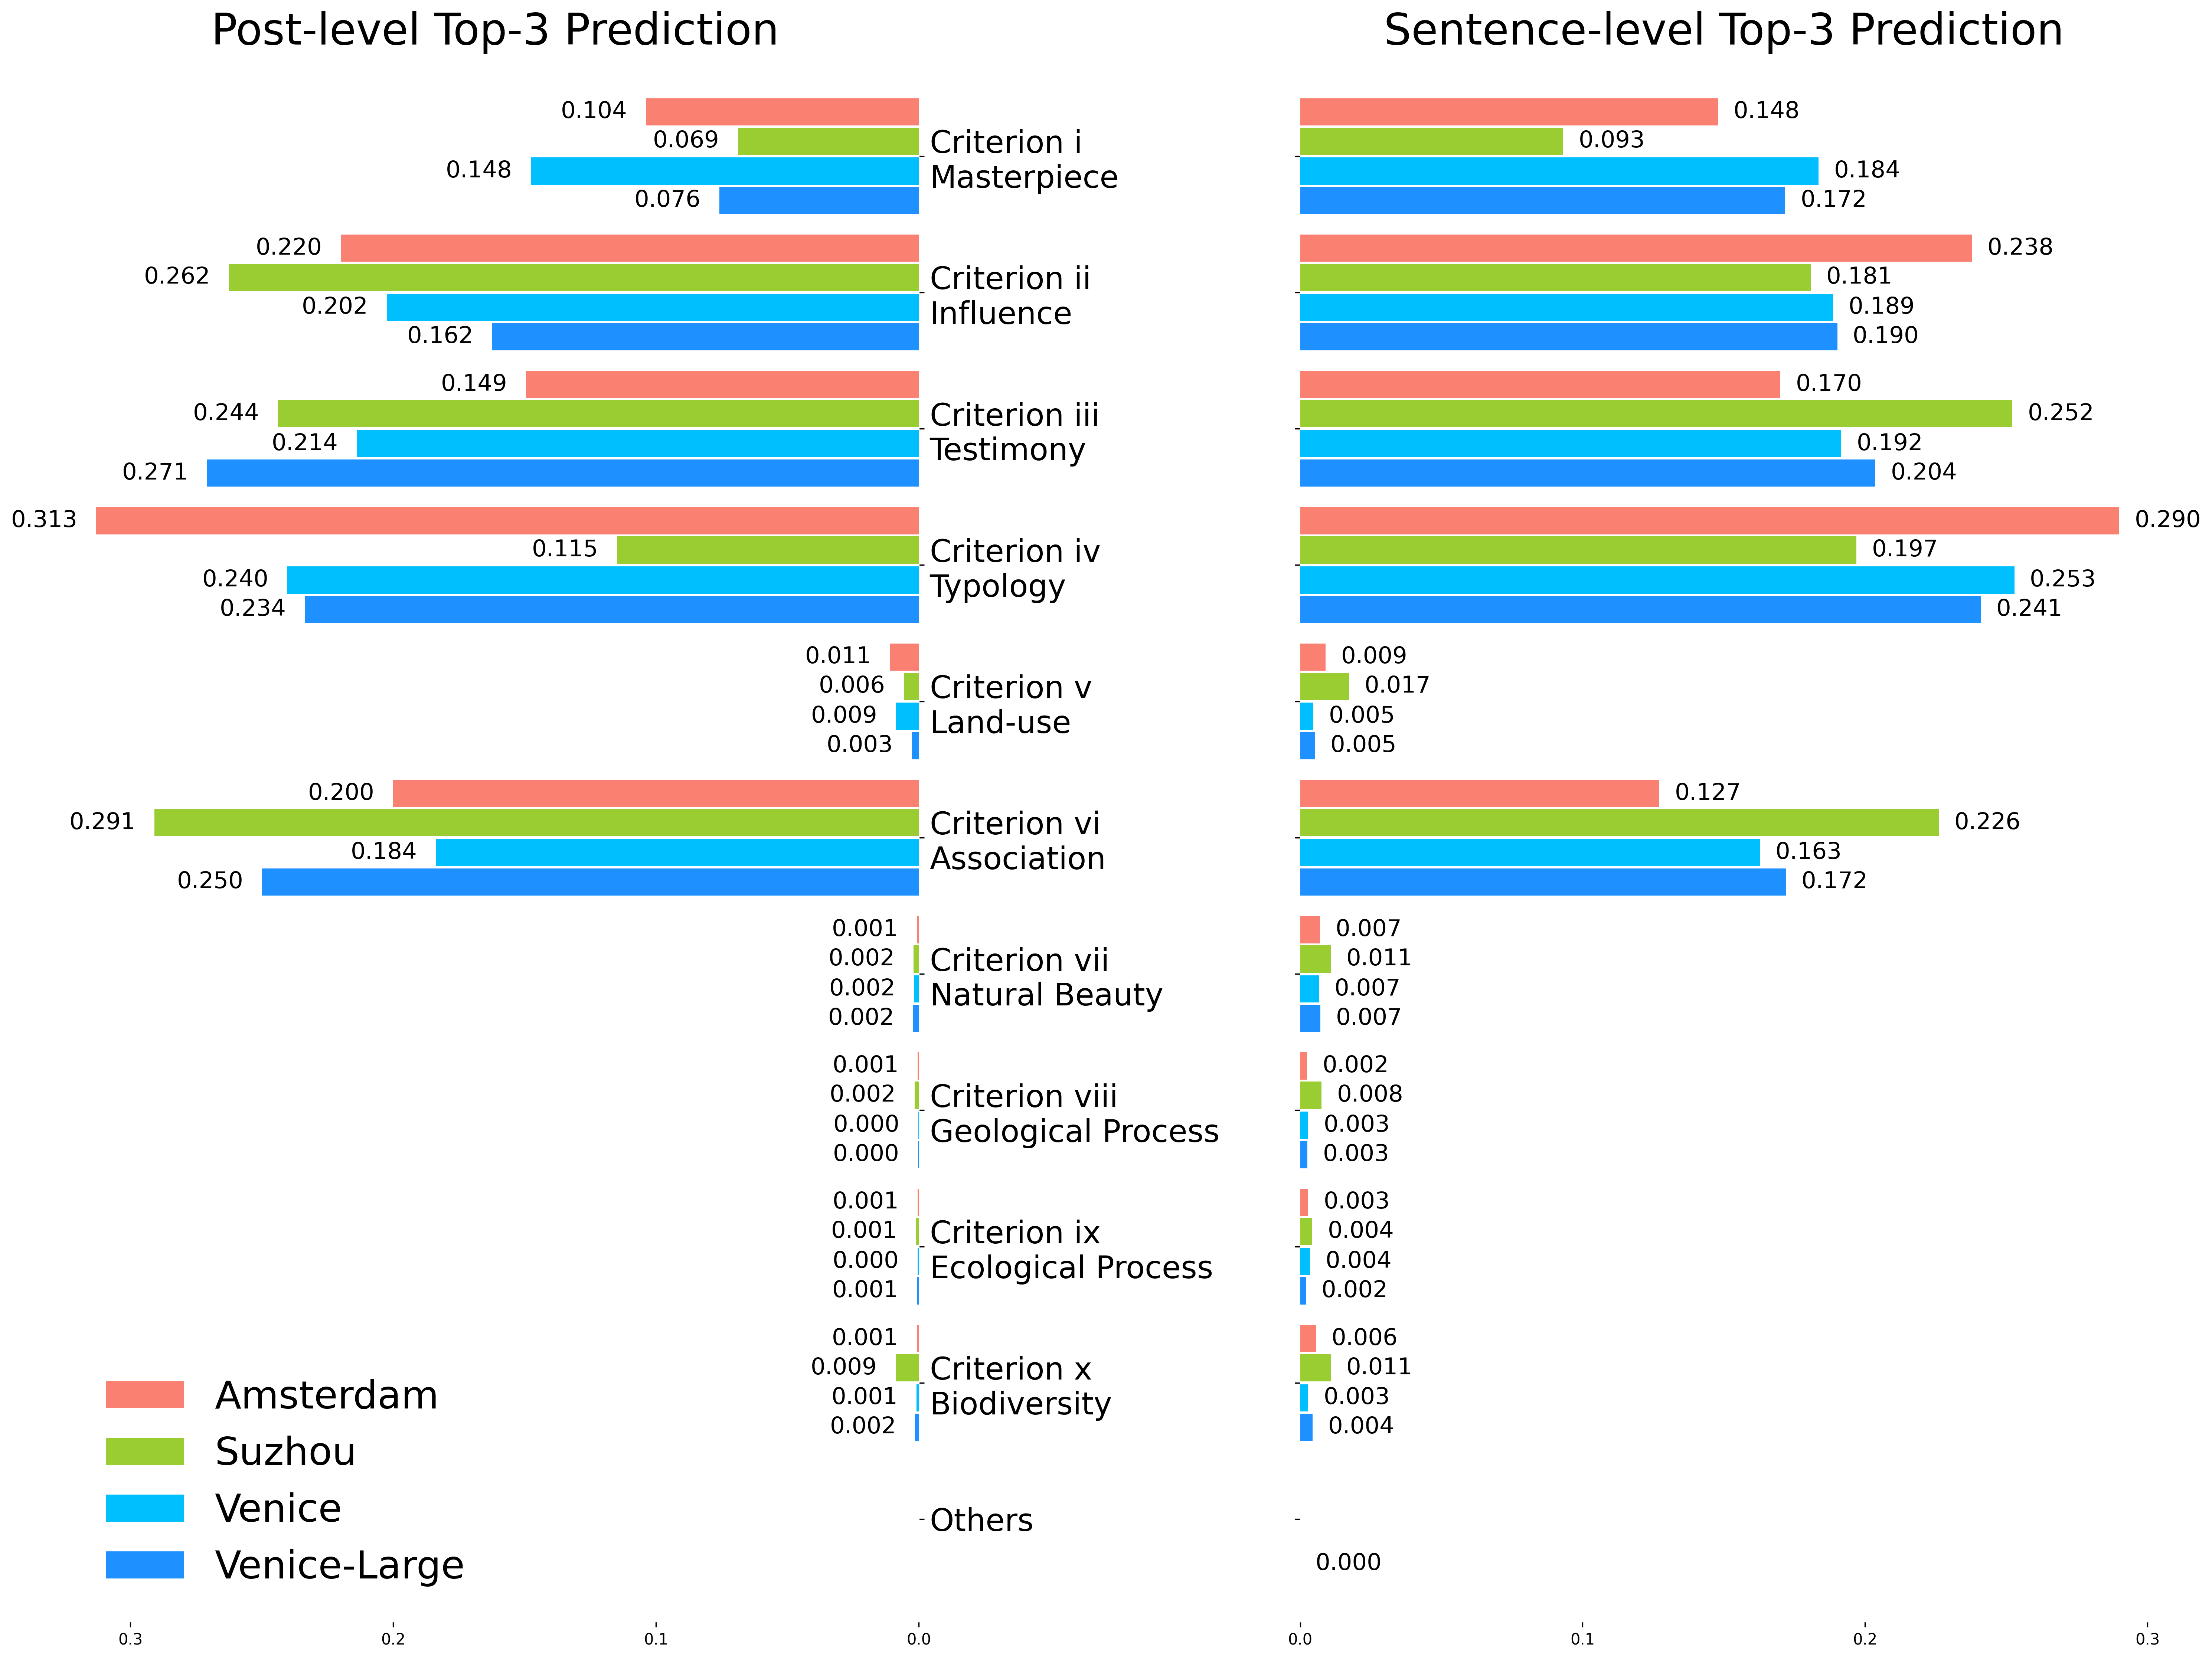

In [413]:
import numpy as np
import matplotlib.pyplot as plt

y = -np.arange(len(classes))
width = 0.25

#plt.figure(figsize=(40,40),dpi=300)
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(20,15),dpi=300)

p1=axes[0].barh(y+ width*1.3, plotper['AMS'], align='center', color='salmon', zorder=10, height=width*0.8, label='Amsterdam')
p2=axes[0].barh(y+ width*0.44, plotper['SUZ'], align='center', color='yellowgreen', zorder=10, height=width*0.8, label='Suzhou')
p3=axes[0].barh(y- width*0.44, plotper['VEN'], align='center', color='deepskyblue', zorder=10, height=width*0.8, label='Venice')
p4=axes[0].barh(y- width*1.3, plotper['VEN_XL'], align='center', color='dodgerblue', zorder=10, height=width*0.8, label='Venice-Large')
axes[0].set_title('Post-level Top-3 Prediction',size=28)

#axes[0].set(title='Post-level Prediction')

hbars_1 = axes[1].barh(y+ width*1.3, plotper['AMS_s'], align='center', color='salmon',height=width*0.8,  zorder=10)
hbars_2 = axes[1].barh(y+ width*0.44, plotper['SUZ_s'], align='center', color='yellowgreen', height=width*0.8, zorder=10)
hbars_3 = axes[1].barh(y- width*0.44, plotper['VEN_s'], align='center', color='deepskyblue',height=width*0.8,  zorder=10)
hbars_4 = axes[1].barh(y- width*1.3, plotper['VEN_XL_s'], align='center', color='dodgerblue', height=width*0.8, zorder=10)
axes[1].set_title('Sentence-level Top-3 Prediction', size=28)
#axes[1].set(title='Sentence-level Prediction',size=20)

axes[0].bar_label(p1, fmt='%.3f',padding=-55,size=15)
axes[0].bar_label(p2, fmt='%.3f',padding=-55,size=15)
axes[0].bar_label(p3, fmt='%.3f',padding=-55,size=15)
axes[0].bar_label(p4, fmt='%.3f',padding=-55,size=15)
axes[0].invert_xaxis()
axes[0].set_yticks(y, labels=classes_new,size=20)
#axes[0].set(yticks=y, yticklabels=classes)
axes[0].yaxis.tick_right()

axes[1].bar_label(hbars_1, fmt='%.3f',padding=10,size=15)
axes[1].bar_label(hbars_2, fmt='%.3f',padding=10,size=15)
axes[1].bar_label(hbars_3, fmt='%.3f',padding=10,size=15)
axes[1].bar_label(hbars_4, fmt='%.3f',padding=10,size=15)

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)
    ax.set_xticks([0,0.1,0.2,0.3])
    #ax.axis('off')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

fig.tight_layout()
fig.subplots_adjust(wspace=0.45)
axes[0].legend(frameon=False,fontsize=25,loc=3)
plt.show()

## Chi-square Tests

In [16]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

In [11]:
chisquare([1.6, 1.8, 1.6, 1.4, 1.2, 1.2], f_exp=[1.6, 1.6, 1.6, 1.6, 1.6, .8])

Power_divergenceResult(statistic=0.35, pvalue=0.9965956325533629)

In [12]:
chisquare([160, 180, 160, 140, 120, 120], f_exp=[160, 160, 160, 160, 160, 80])

Power_divergenceResult(statistic=35.0, pvalue=1.5046506621757205e-06)

In [18]:
from scipy.stats import chi2_contingency
import numpy as np
obs = np.array([[10, 10, 20], [20, 20, 20]])
chi2_contingency(obs)

(2.7777777777777777,
 0.24935220877729622,
 2,
 array([[12., 12., 16.],
        [18., 18., 24.]]))

In [49]:
x1 = np.array([26534, 29387, 31466, 37241, 800, 26584, 1113, 393, 325, 680])
x1.sum()/6

25753.833333333332

In [43]:
x2 = np.array([1827,1878,1907,2517,47,1621,66,28,35,28])
x2.sum()/6

1659.0

In [46]:
x3 = np.array([11731,25096,41880,36121,432,38640,345,54,92,235])
x3.sum()/6

25771.0

In [44]:
x4 = np.array([670,918,970,1090,39,834,8,1,2,4])
x4.sum()/6

756.0

In [56]:
x5 = np.array([274,196,392,28,177,65,188,28,8])
x5.sum()

1356

In [58]:
x6 = np.array([4578,4242,9146,436,7442,1797,7680,684,1284])
x6.sum()

37289

In [33]:
x3 = x1/x1.sum()*x2.sum()

In [36]:
x3

array([1709.2564602 , 1893.03985814, 2026.96403772, 2398.97564764,
         51.53407583, 1712.47733994,   71.696783  ,   25.31611475,
         20.93571831,   43.80396446])

In [35]:
chisquare(x2, f_exp=x3)

Power_divergenceResult(statistic=42.30954583591253, pvalue=2.8848385131644893e-06)

In [37]:
from scipy.stats import entropy
entropy(x2,x1)

0.0020859149204444727

In [63]:
entropy(x4/x4.sum(),x3/x3.sum())

0.0514544153389116

In [51]:
entropy(x1,x2)

0.0020764607425106997

In [52]:
entropy(x3,x4)

0.04626216736989267

In [59]:
entropy(x5,x6)

0.07604175339371703

In [60]:
entropy(x6,x5)

0.08970406742804549

In [40]:
chi2_contingency([x1,x2])

(39.51525638157538,
 9.299340740729766e-06,
 9,
 array([[2.66446178e+04, 2.93728703e+04, 3.13532961e+04, 3.73518816e+04,
         7.95740322e+02, 2.64980588e+04, 1.10764798e+03, 3.95521459e+02,
         3.38213124e+02, 6.65152477e+02],
        [1.71638219e+03, 1.89212966e+03, 2.01970392e+03, 2.40611838e+03,
         5.12596776e+01, 1.70694121e+03, 7.13520188e+01, 2.54785411e+01,
         2.17868760e+01, 4.28475228e+01]]))

In [53]:
chi2_contingency([x2,x1])

(39.51525638157537,
 9.29934074072979e-06,
 9,
 array([[1.71638219e+03, 1.89212966e+03, 2.01970392e+03, 2.40611838e+03,
         5.12596776e+01, 1.70694121e+03, 7.13520188e+01, 2.54785411e+01,
         2.17868760e+01, 4.28475228e+01],
        [2.66446178e+04, 2.93728703e+04, 3.13532961e+04, 3.73518816e+04,
         7.95740322e+02, 2.64980588e+04, 1.10764798e+03, 3.95521459e+02,
         3.38213124e+02, 6.65152477e+02]]))

In [55]:
chi2_contingency([x4,x3])

(518.894591066096,
 5.162672219701555e-106,
 9,
 array([[3.53419384e+02, 7.41379877e+02, 1.22119350e+03, 1.06048615e+03,
         1.34231538e+01, 1.12497998e+03, 1.00602405e+01, 1.56745957e+00,
         2.67893090e+00, 6.81132431e+00],
        [1.20475806e+04, 2.52726201e+04, 4.16288065e+04, 3.61505139e+04,
         4.57576846e+02, 3.83490200e+04, 3.42939759e+02, 5.34325404e+01,
         9.13210691e+01, 2.32188676e+02]]))

In [61]:
chi2_contingency([x5,x6])

(188.2409381024855,
 1.9090413680556476e-36,
 8,
 array([[ 170.25001941,  155.72332773,  334.67532669,   16.28112304,
          267.340251  ,   65.33502394,  276.07731919,   24.9831026 ,
           45.3345064 ],
        [4681.74998059, 4282.27667227, 9203.32467331,  447.71887696,
         7351.659749  , 1796.66497606, 7591.92268081,  687.0168974 ,
         1246.6654936 ]]))